In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#lectura de cartografia
dt = gpd.read_file('pxdptodatosok.shp')
dt = dt.to_crs(epsg=3857)
dt['poblacion'] = dt.personas.map(int)
dt = dt.loc[(dt.departamen!= 'Antártida Argentina') & (dt.departamen != 'Islas del Atlántico Sur'),:]
dt['diss']= 1
dt_plot = dt.dissolve('diss')

limite = dt.personas.map(int).sum() / 2

C:\Users\FGONZALEZ\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


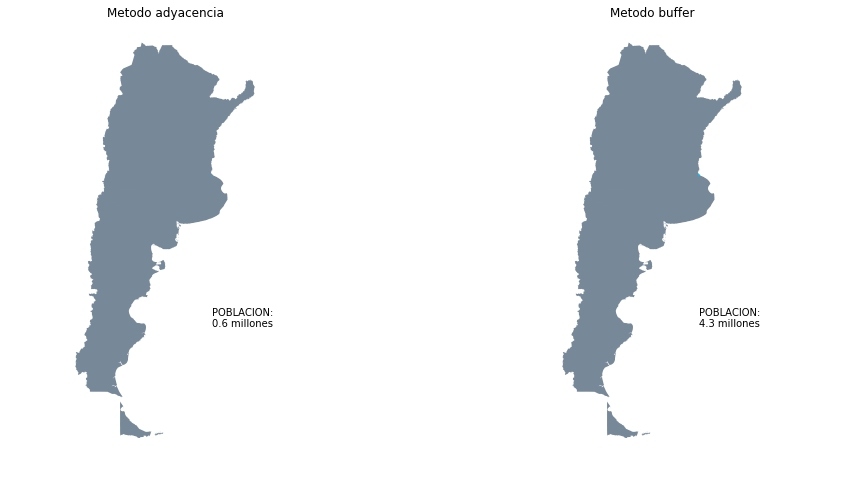

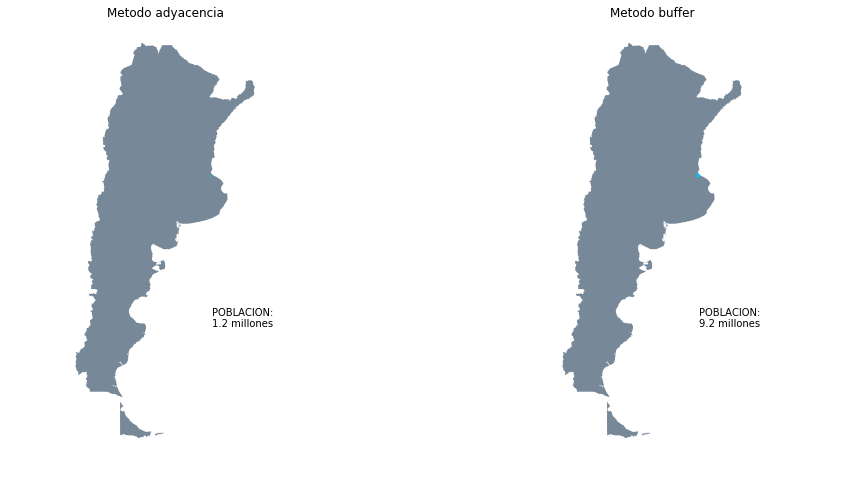

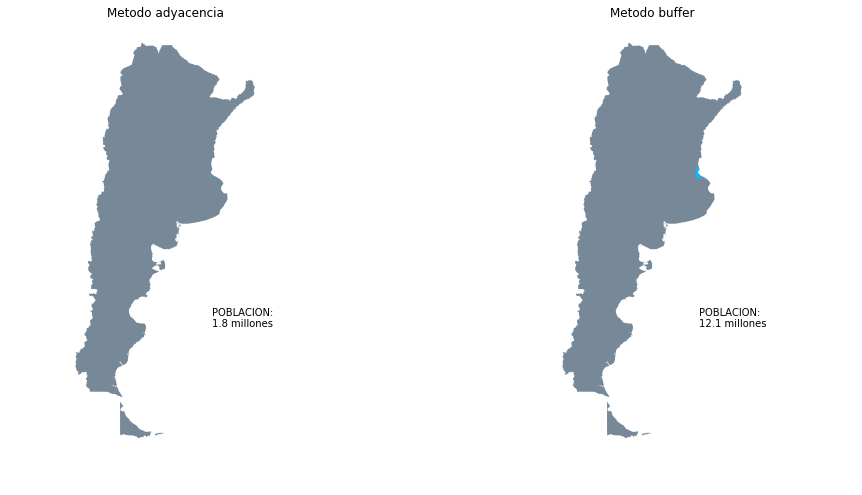

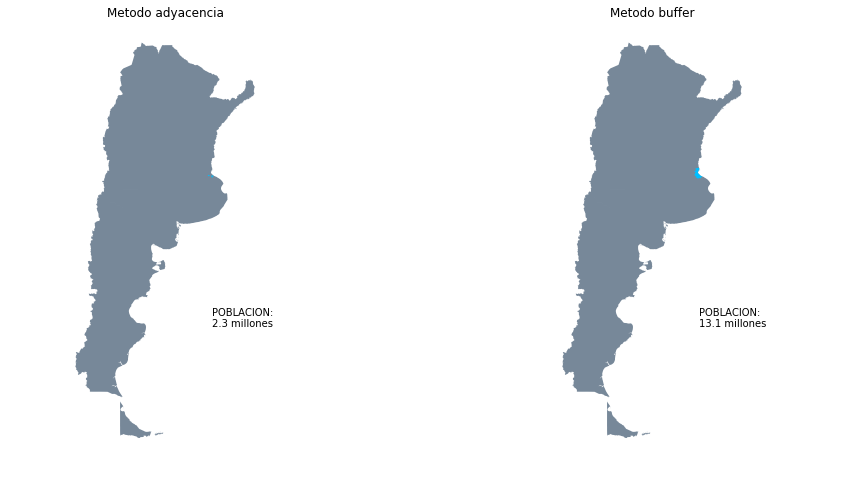

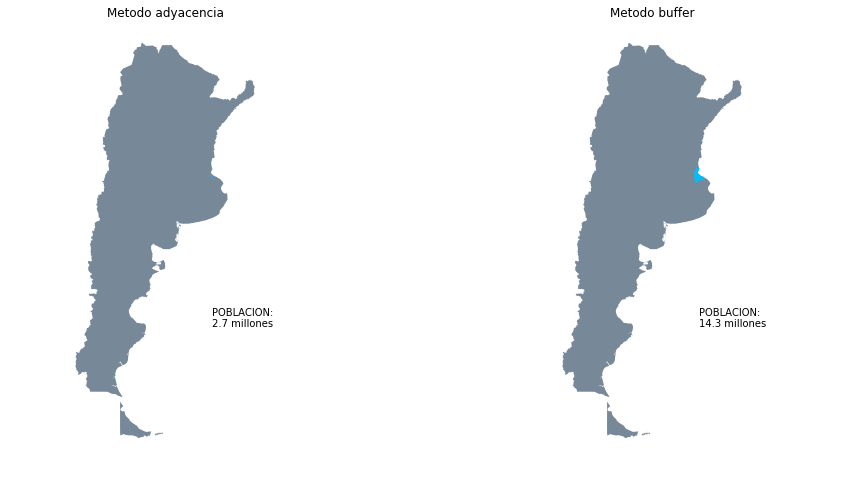

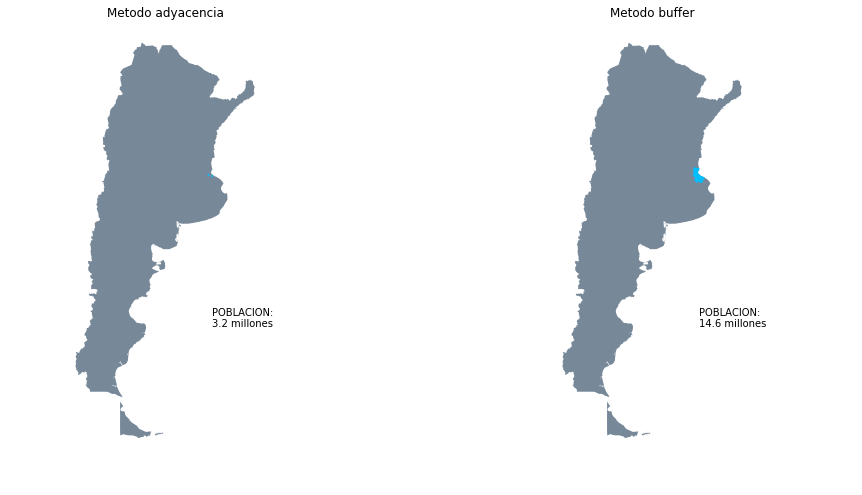

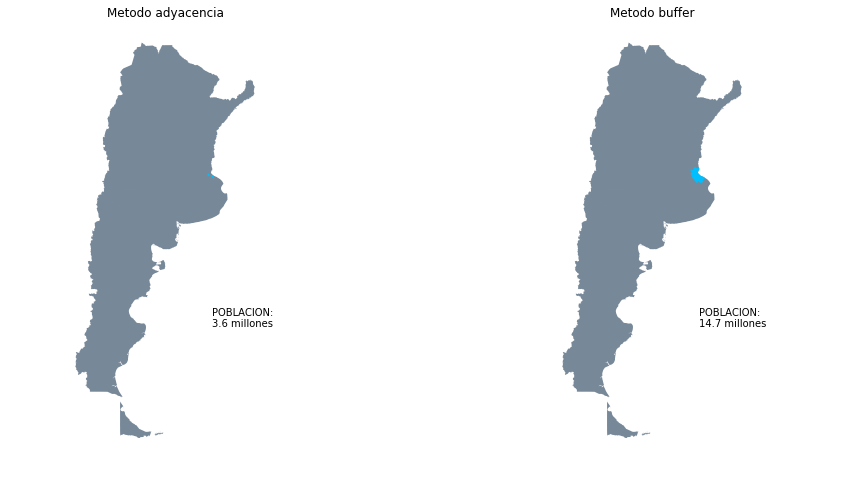

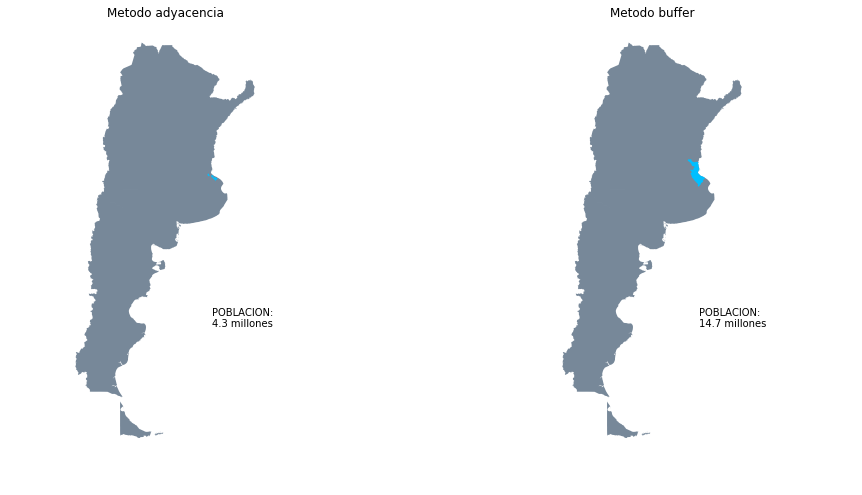

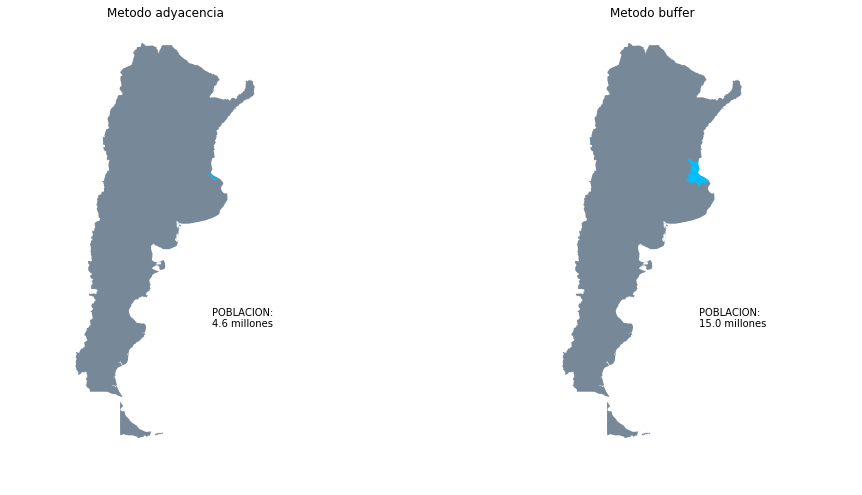

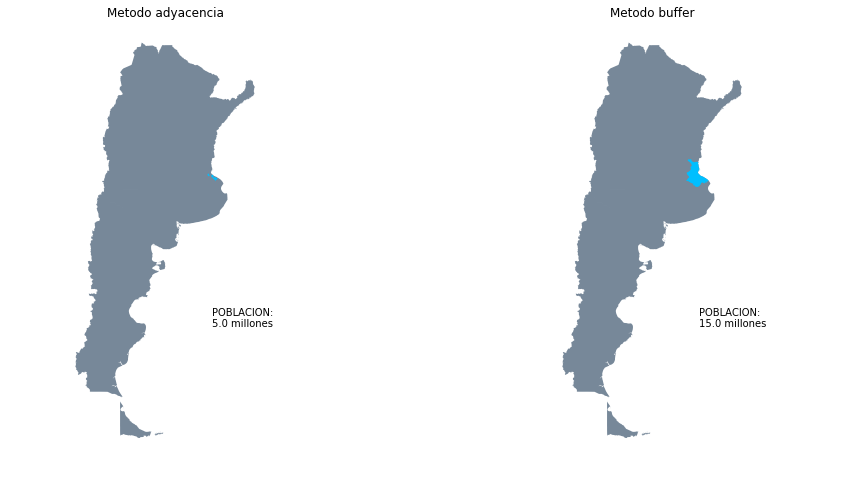

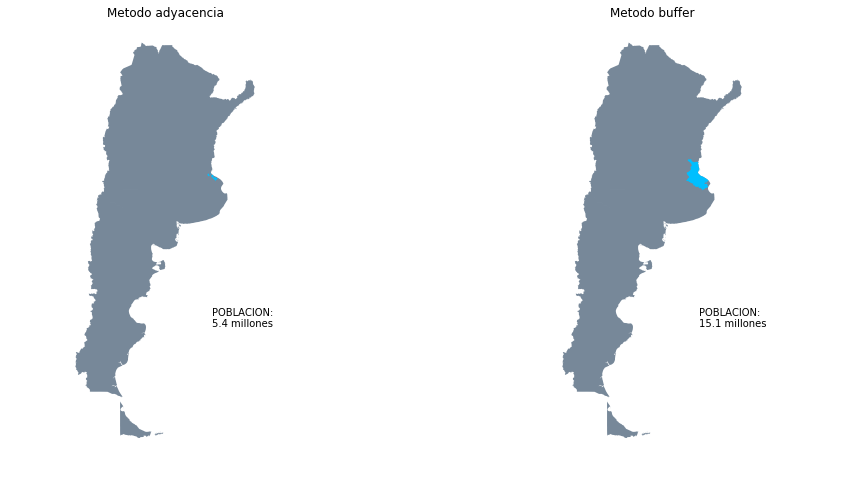

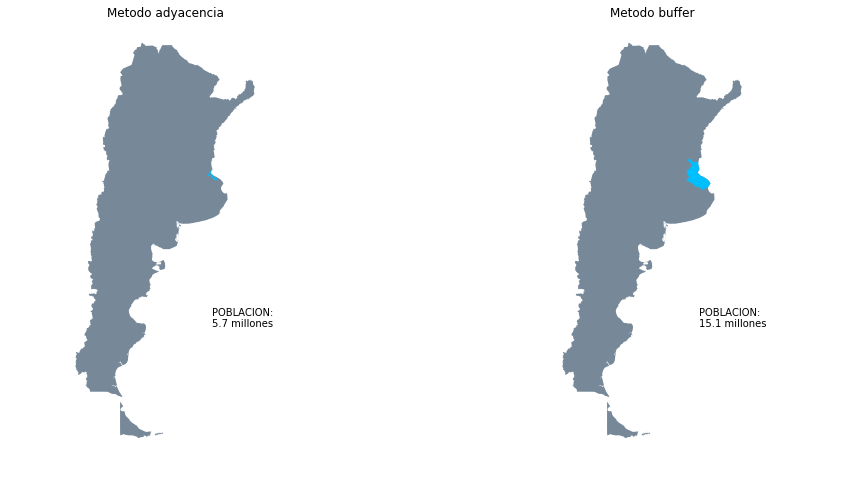

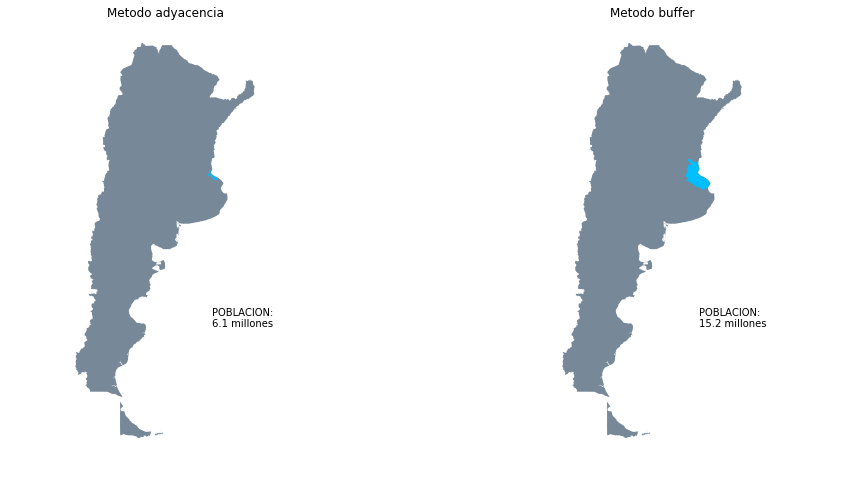

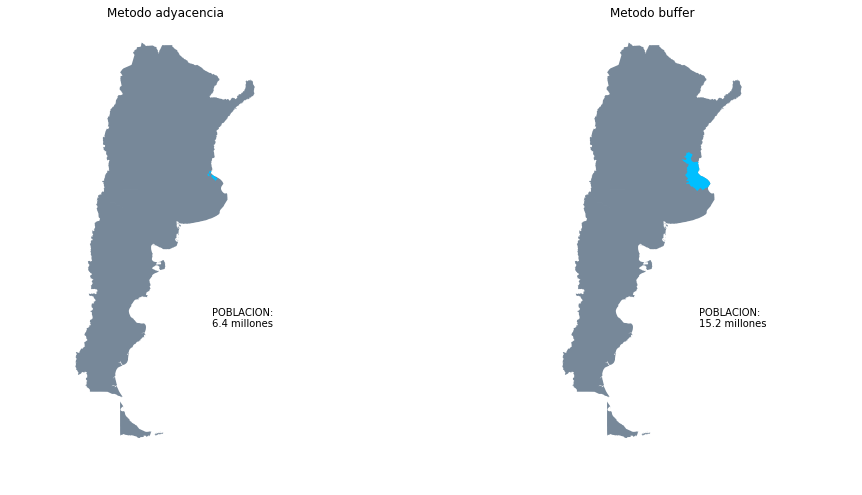

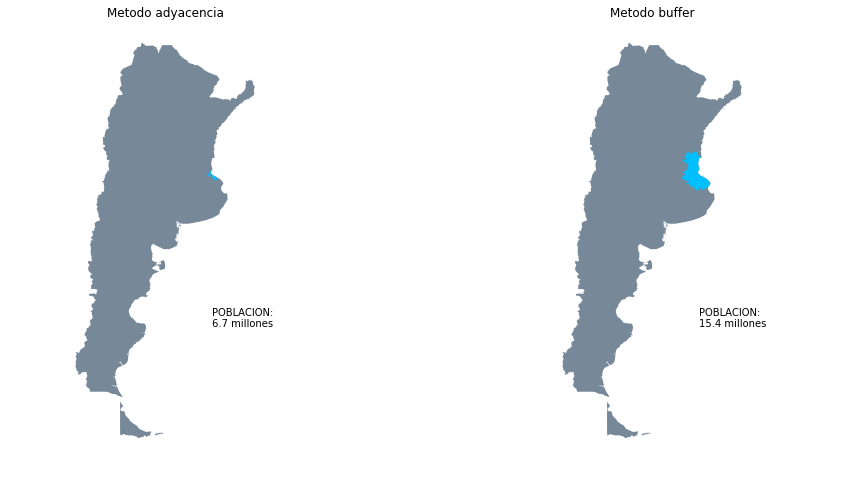

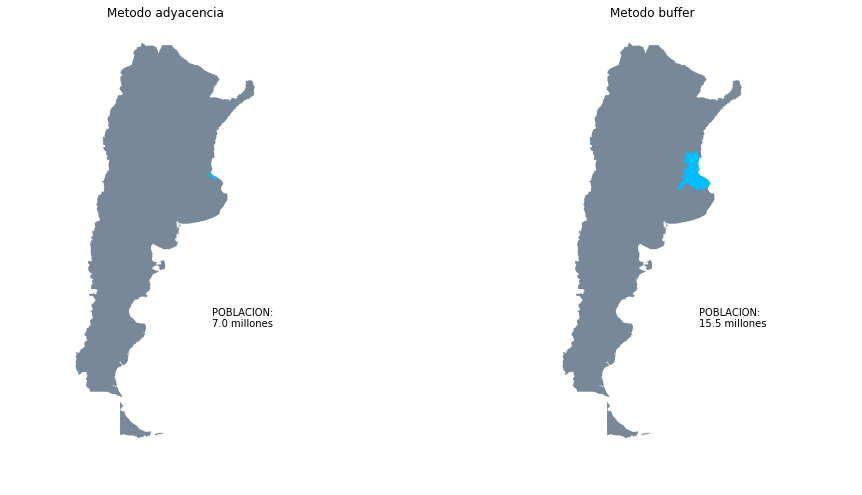

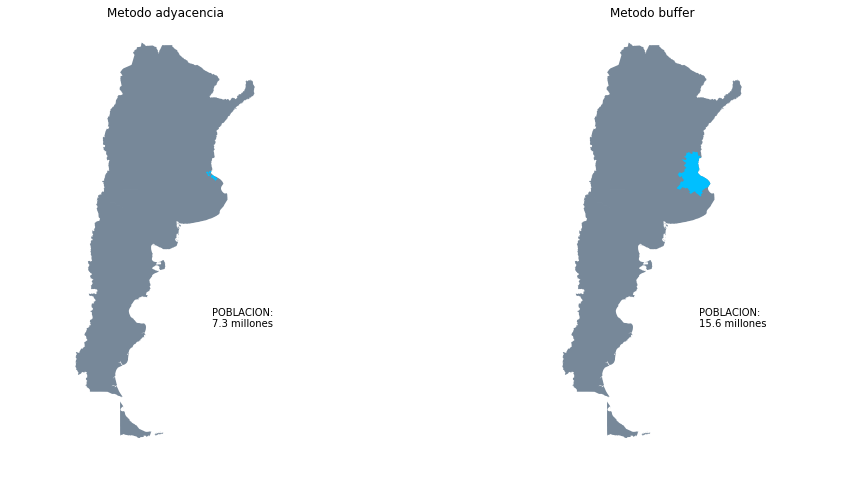

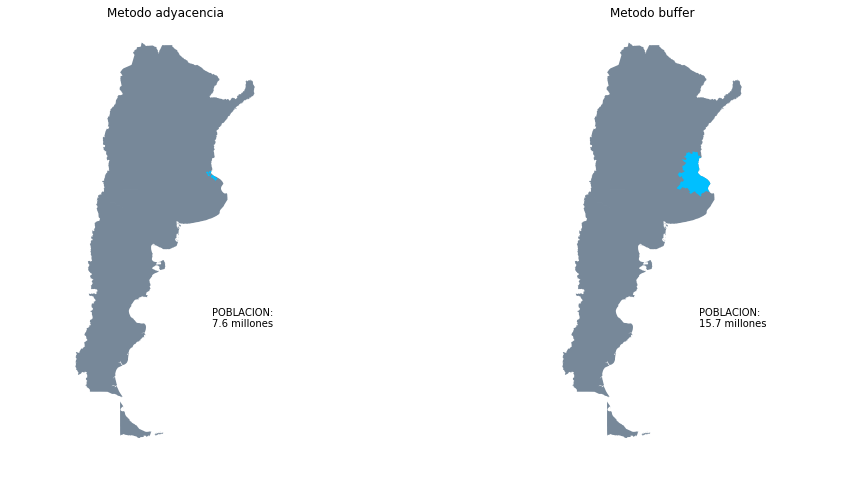

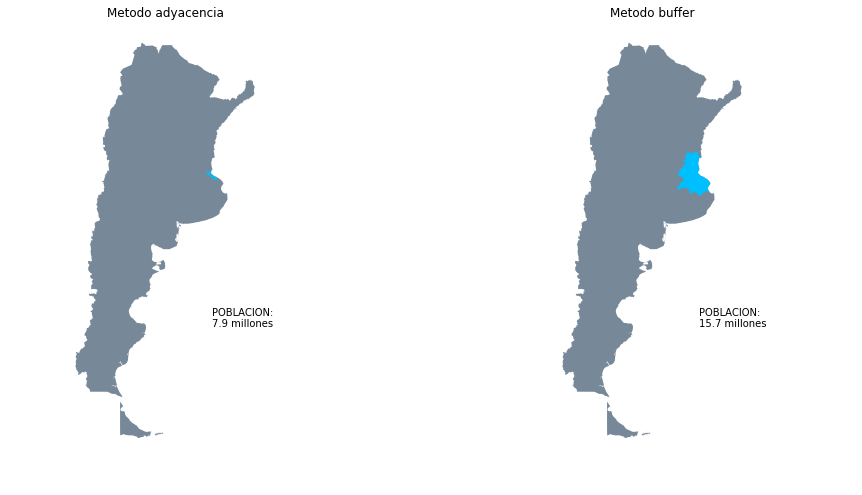

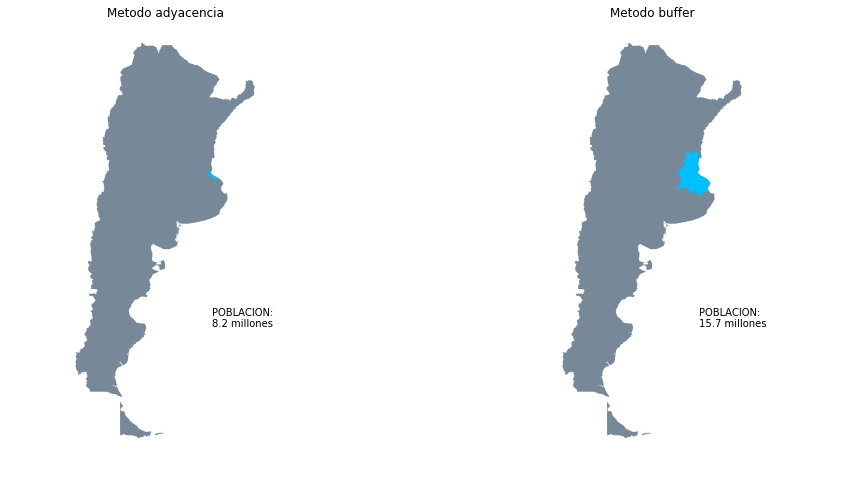

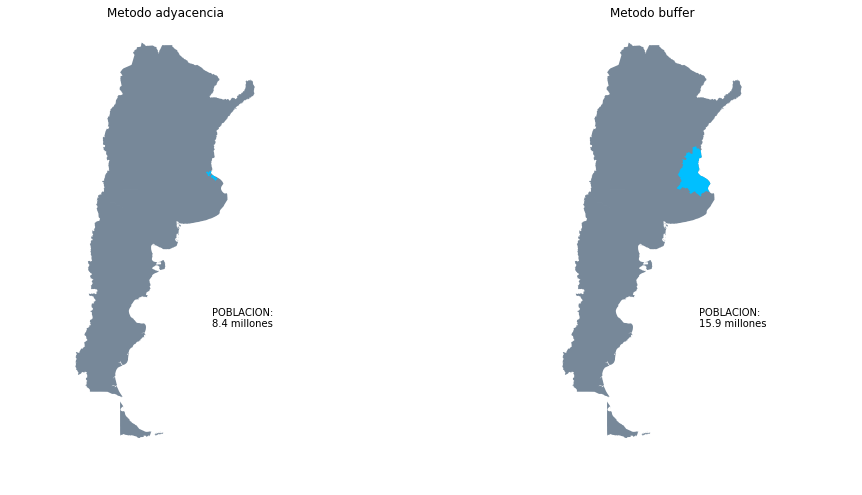

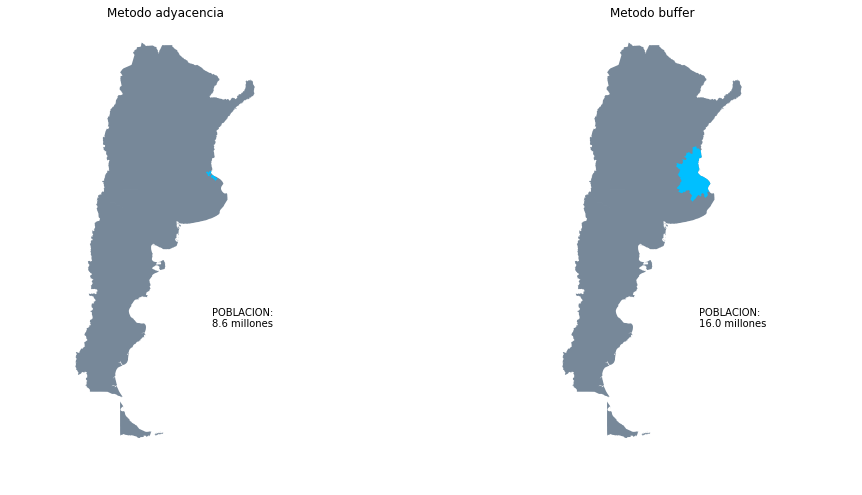

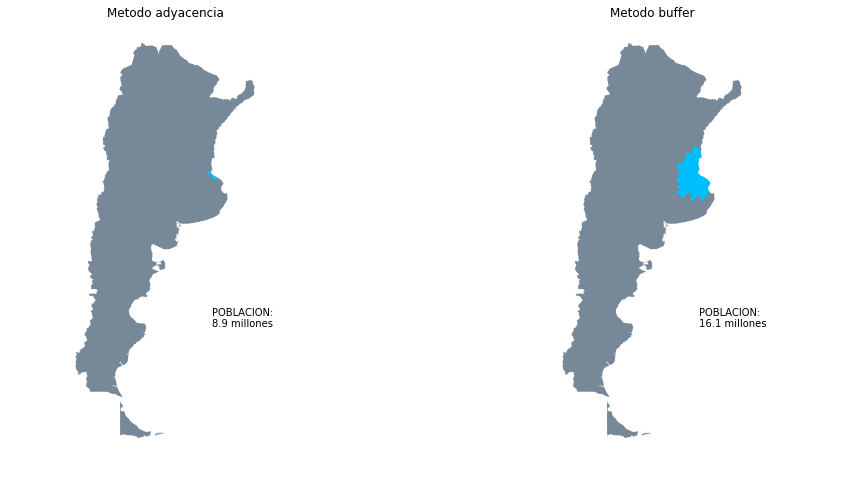

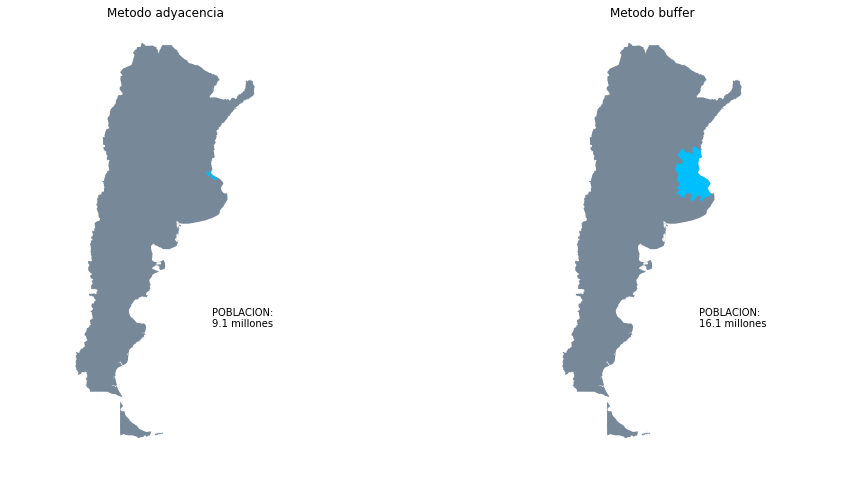

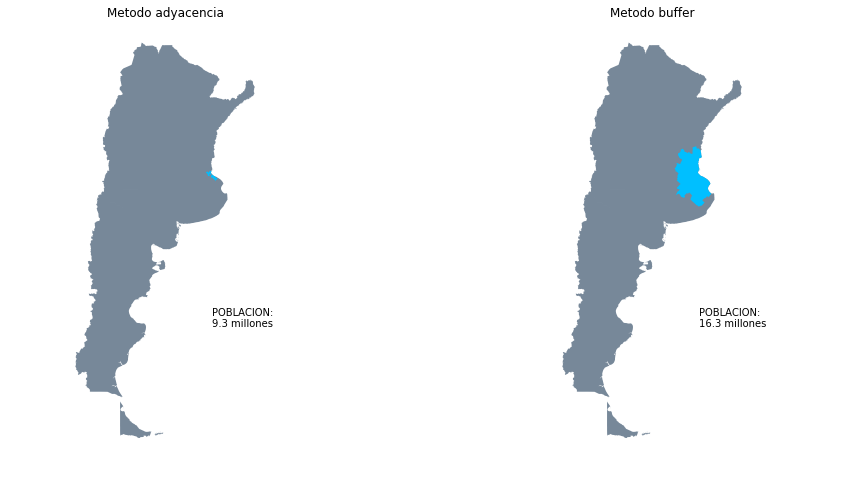

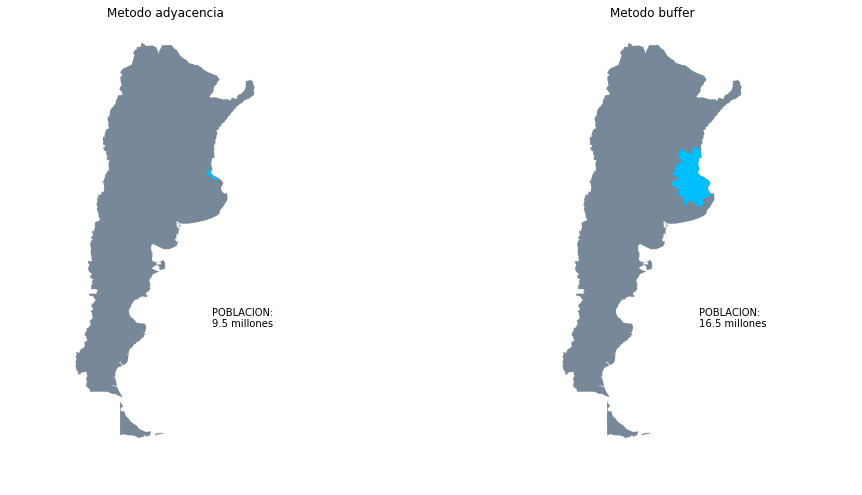

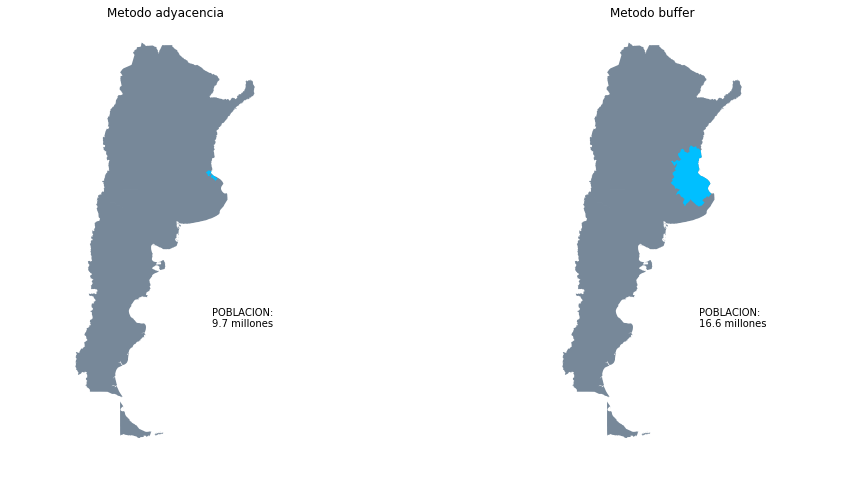

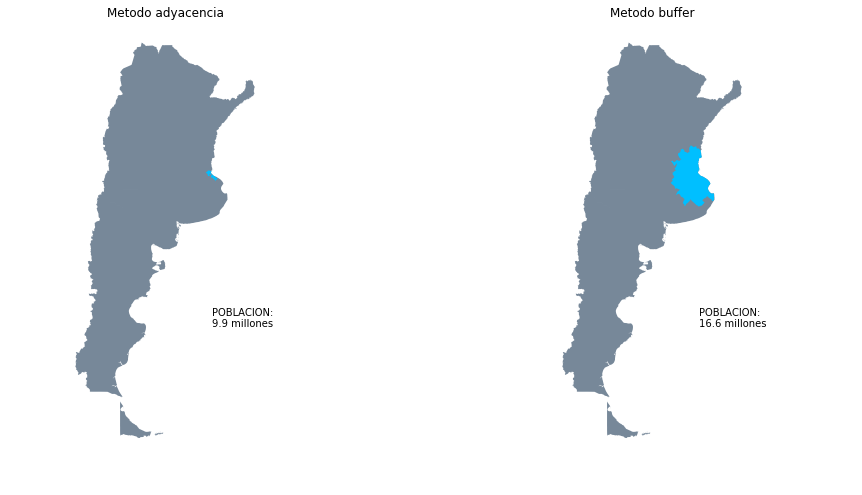

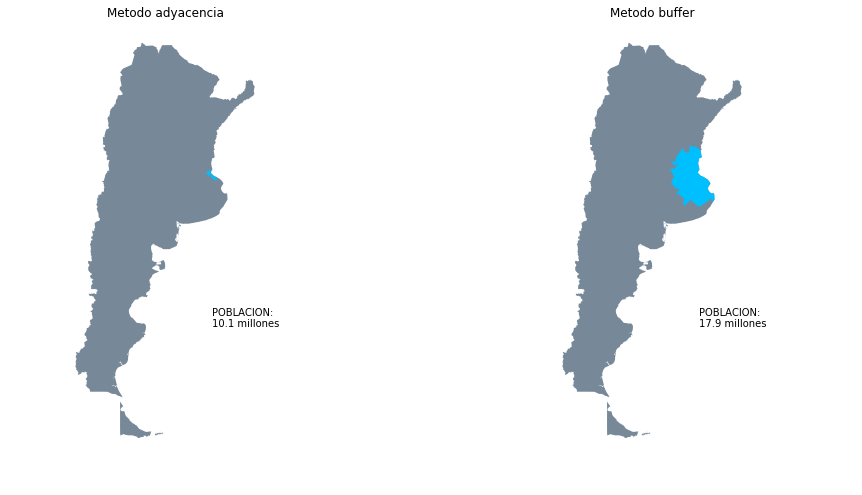

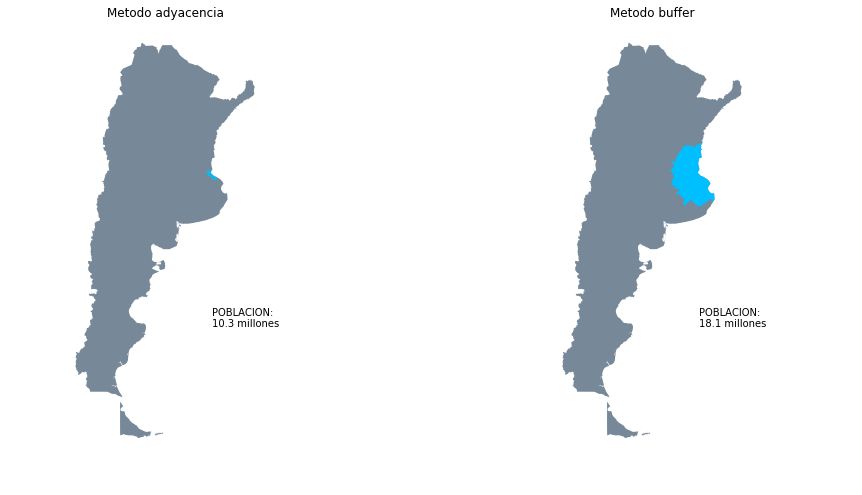

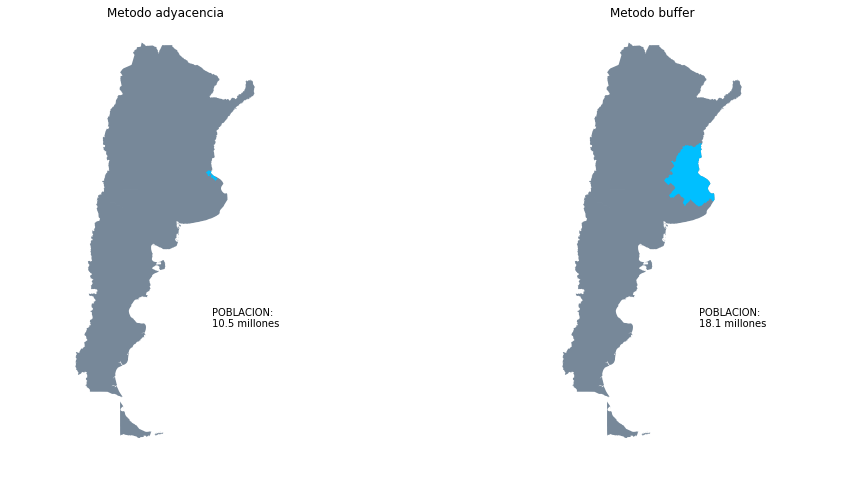

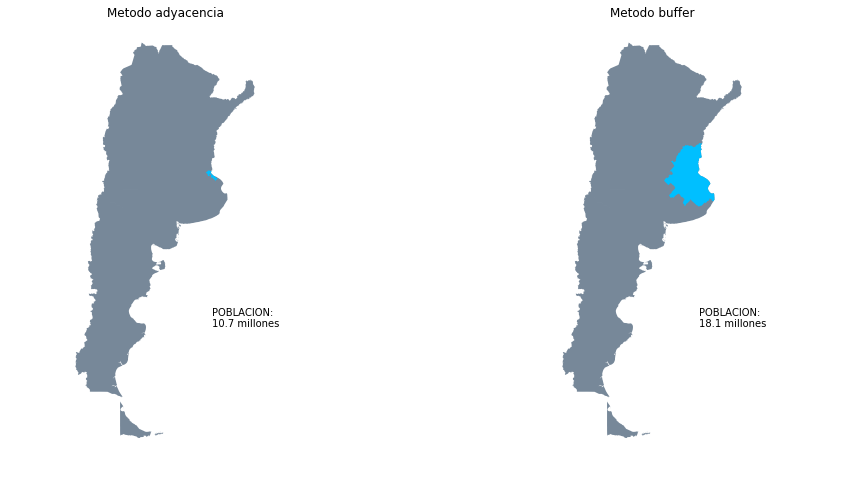

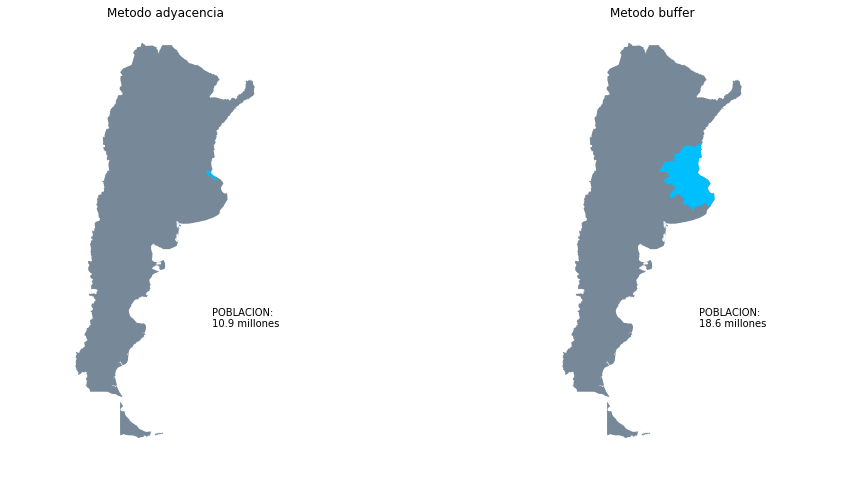

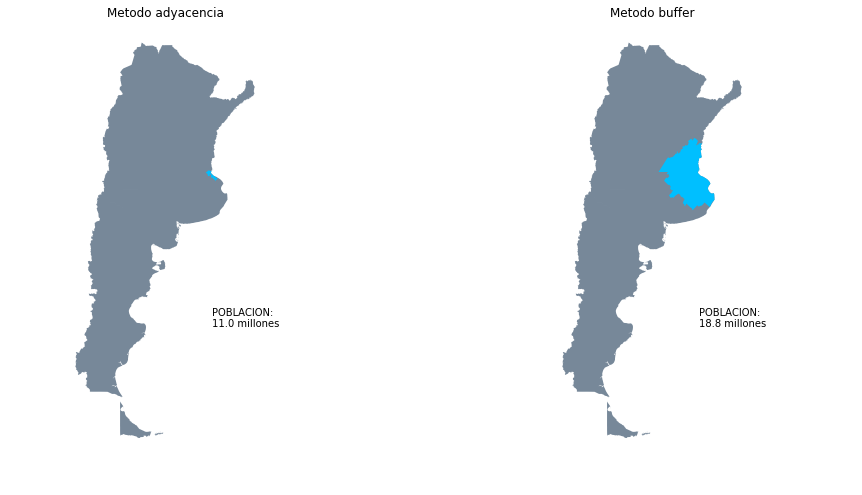

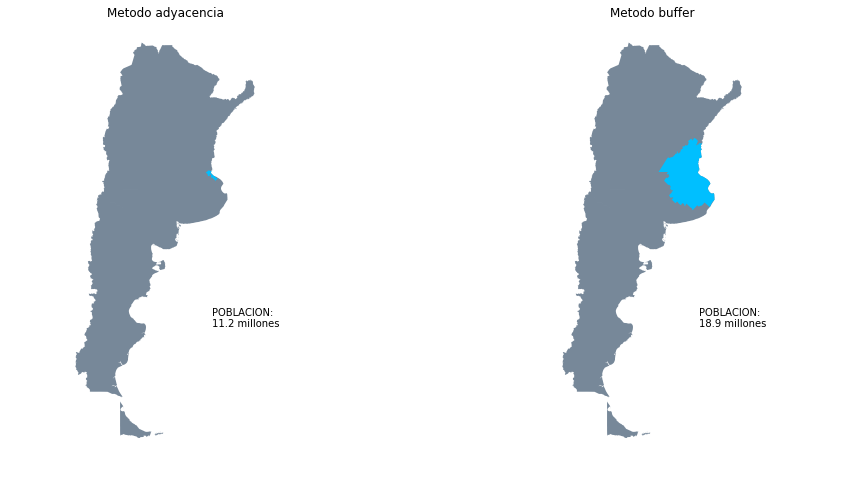

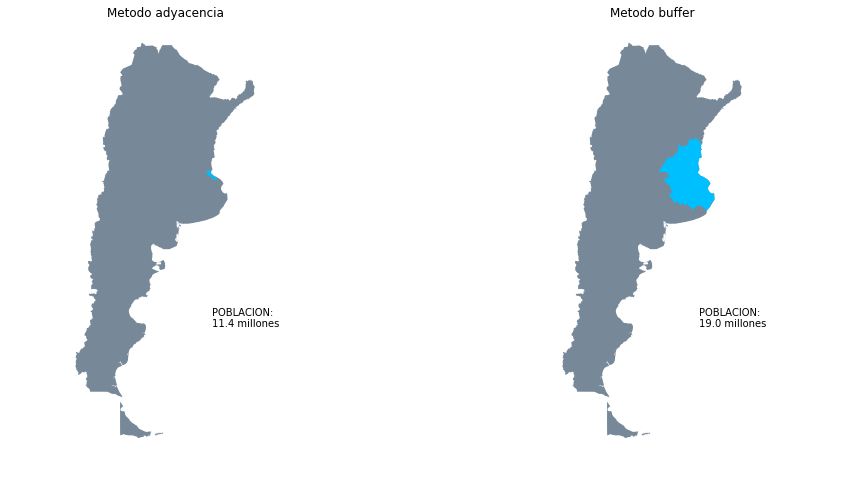

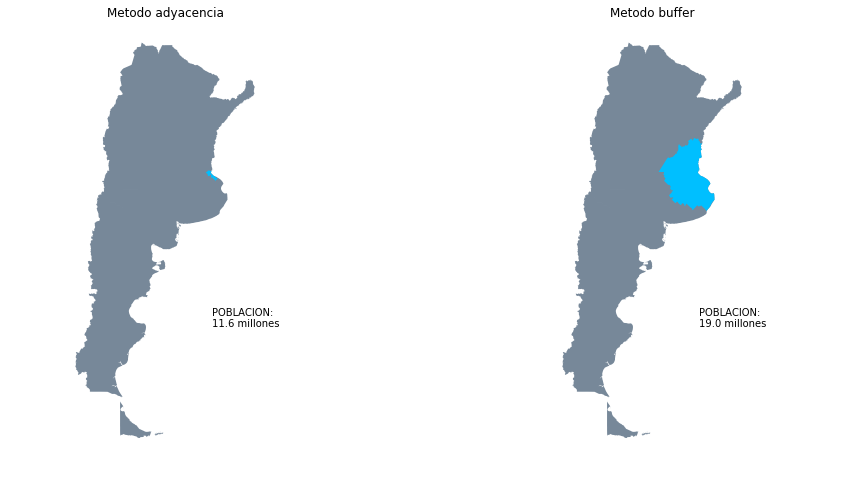

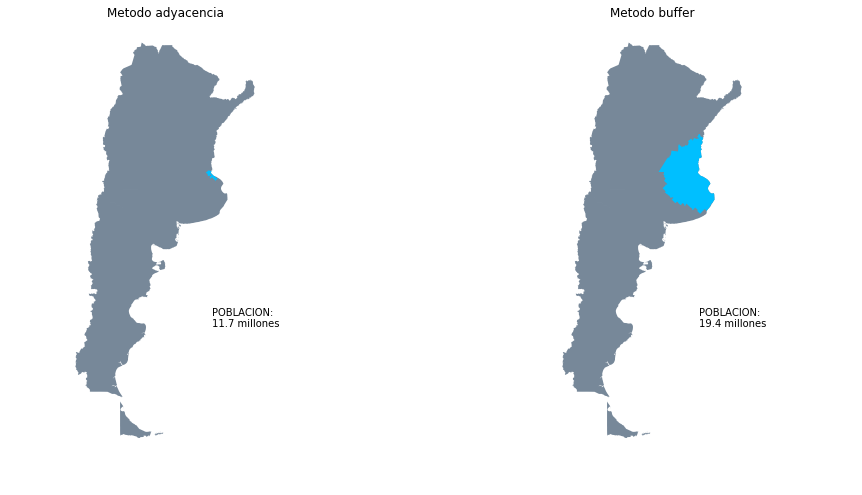

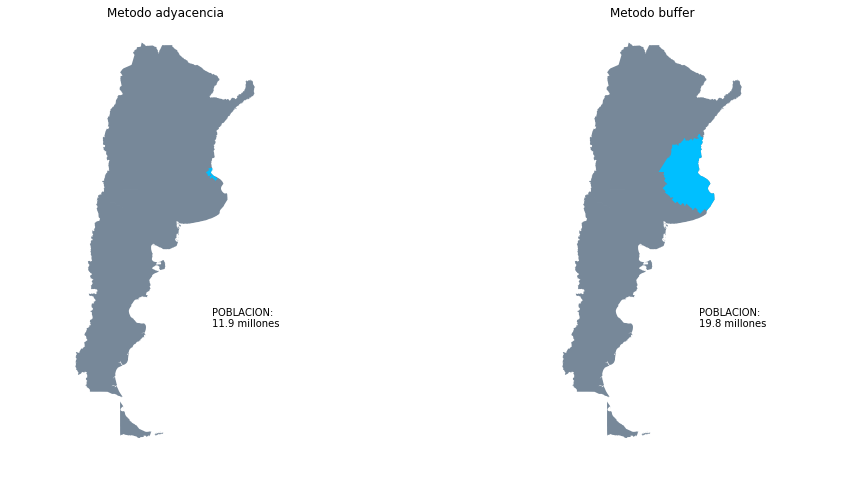

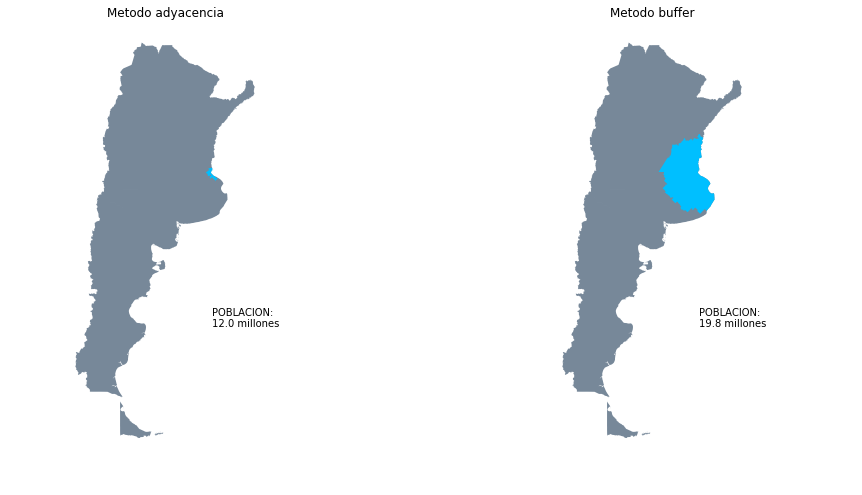

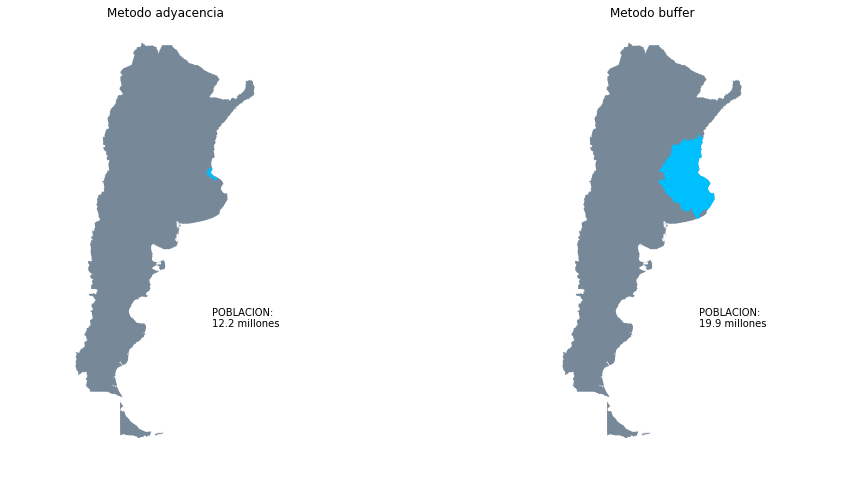

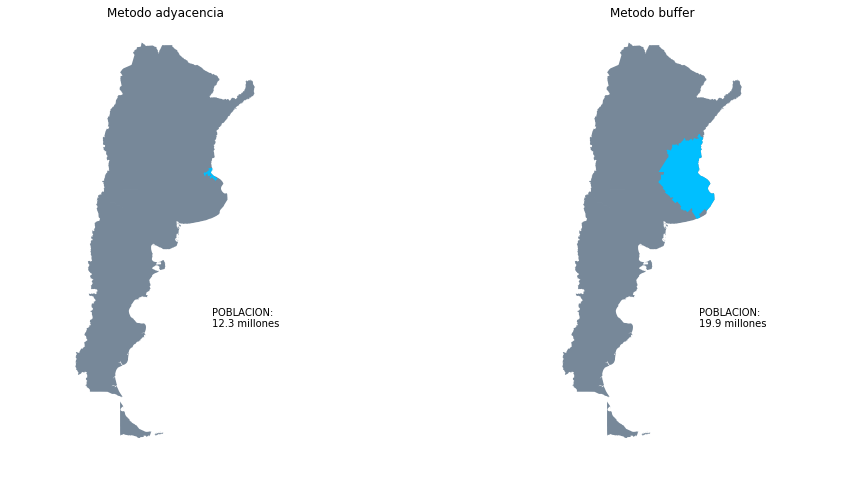

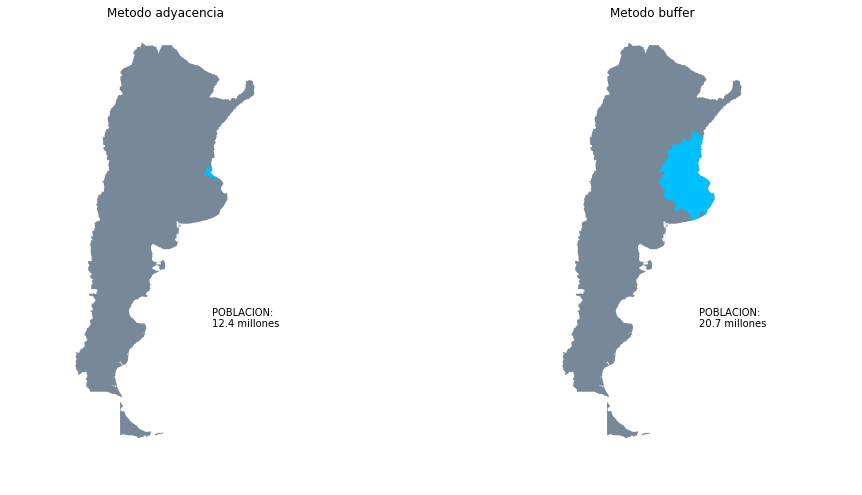

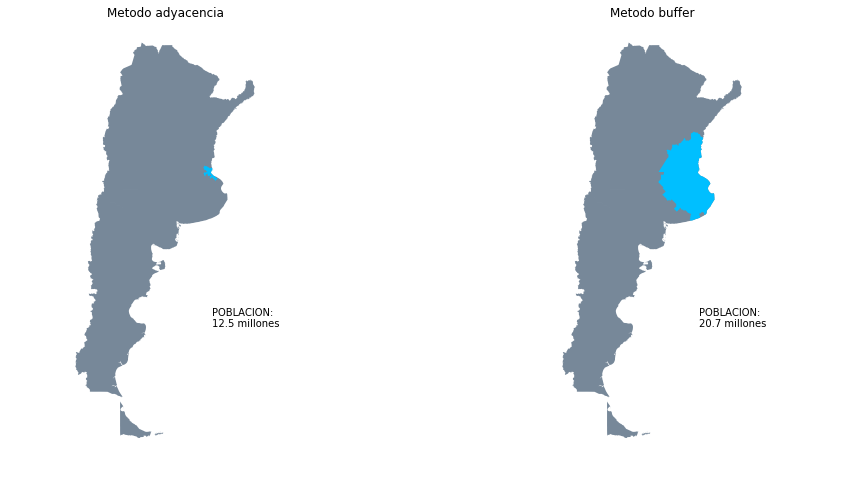

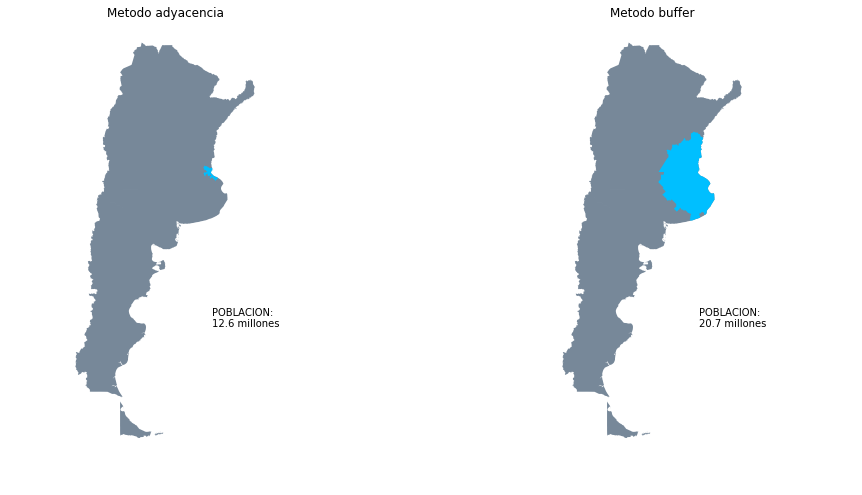

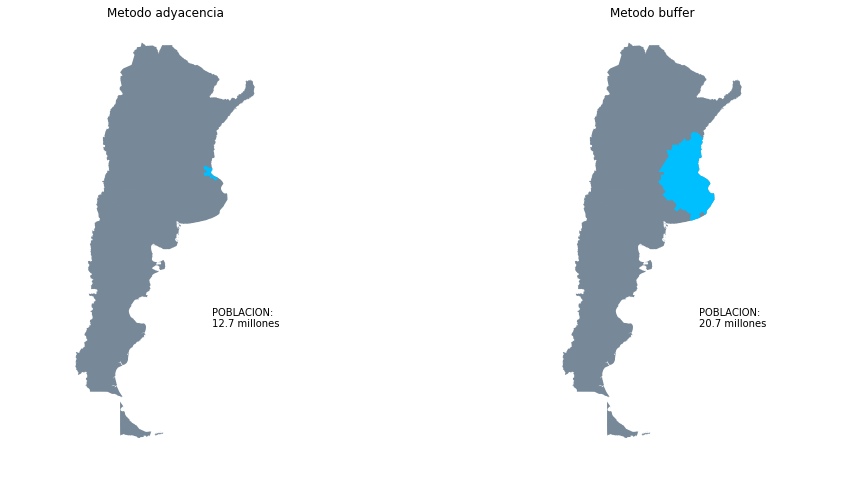

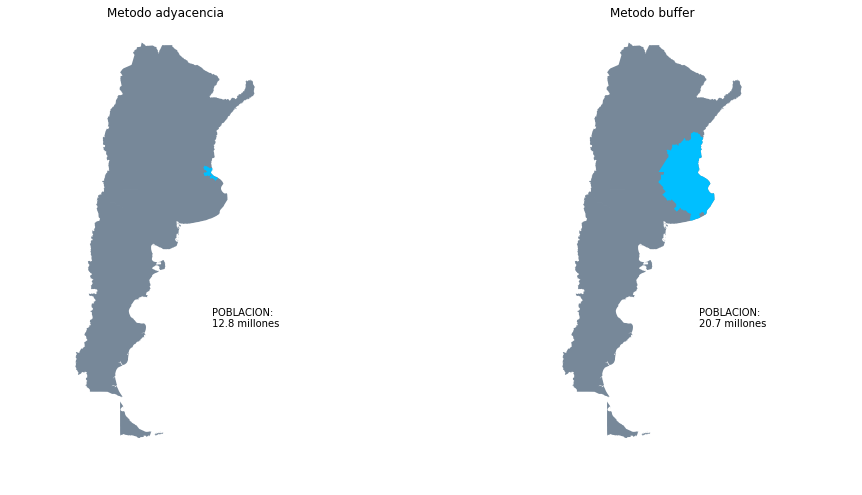

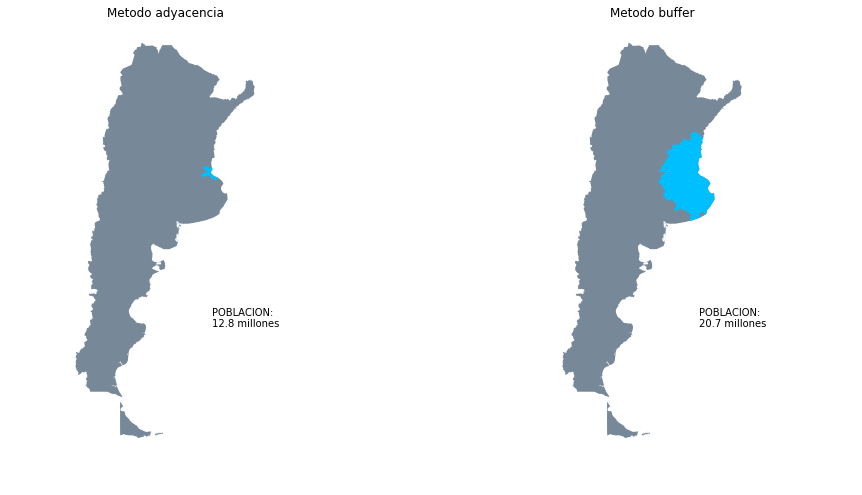

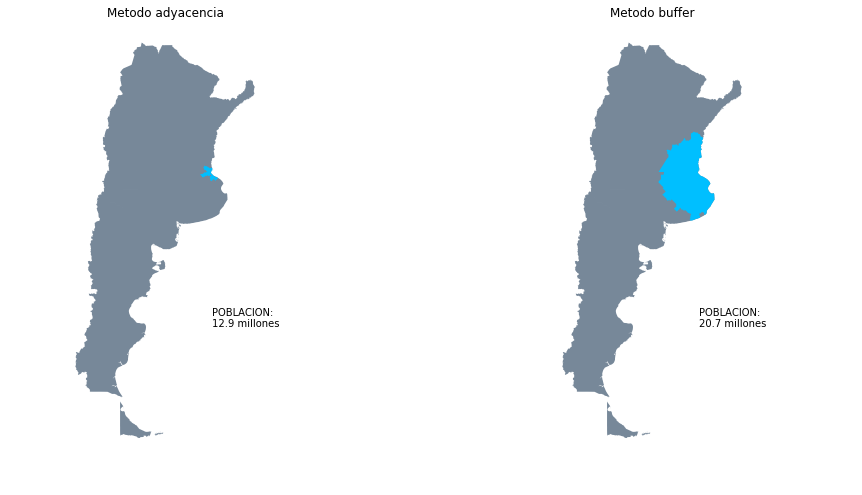

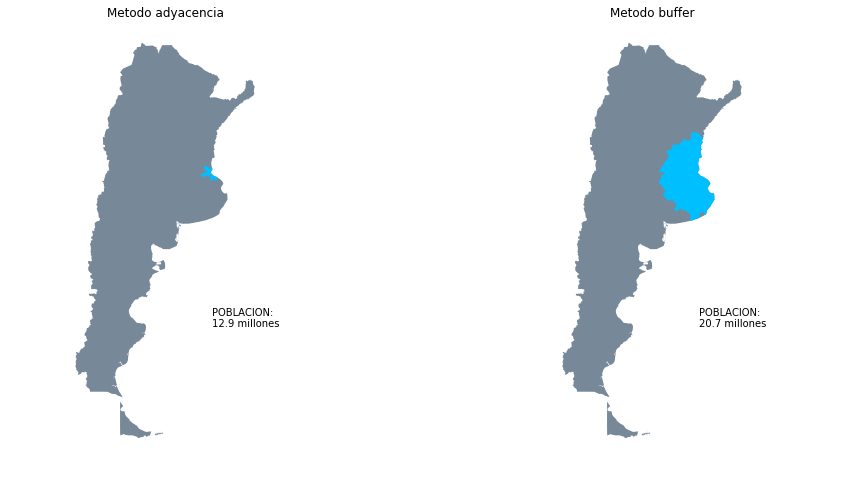

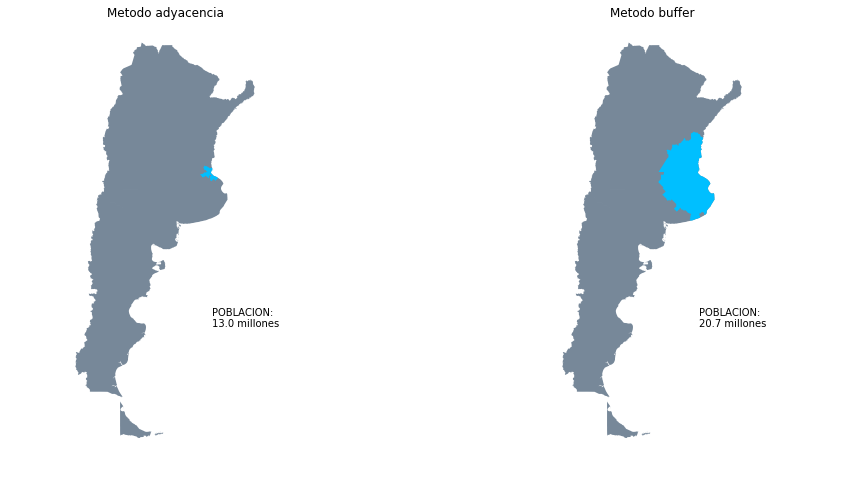

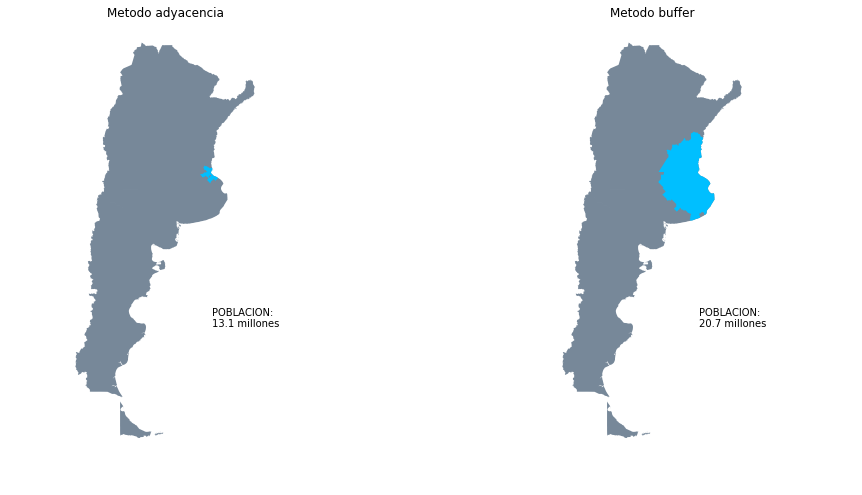

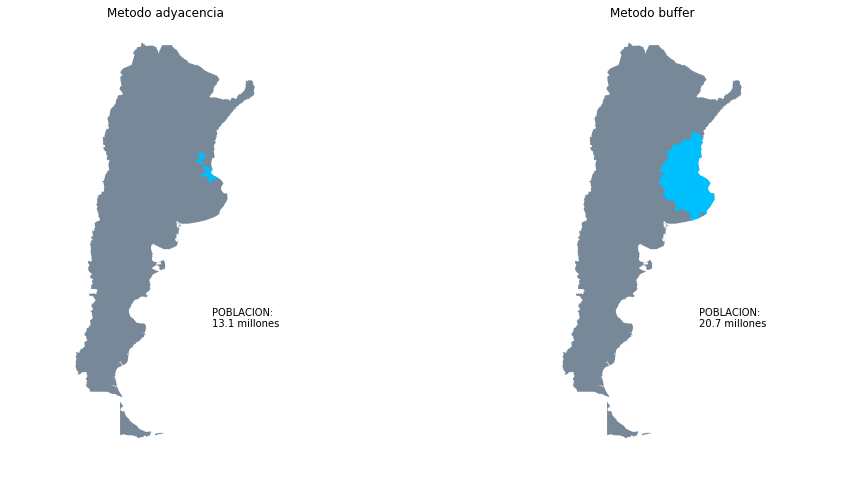

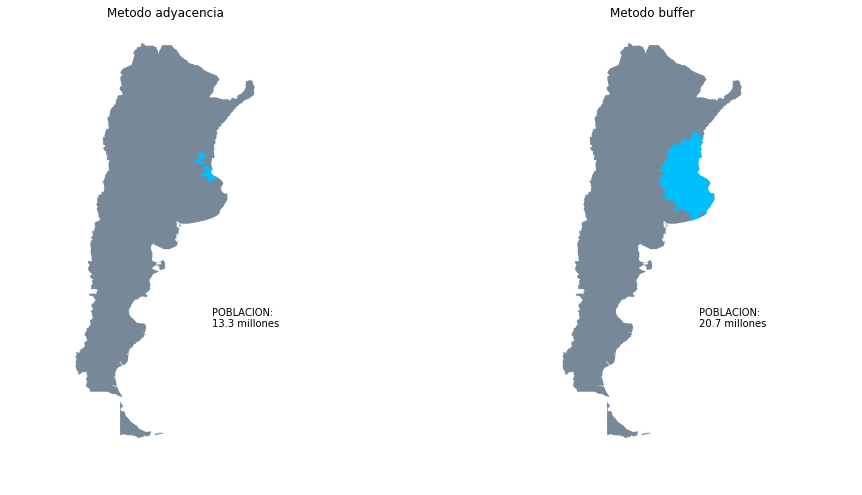

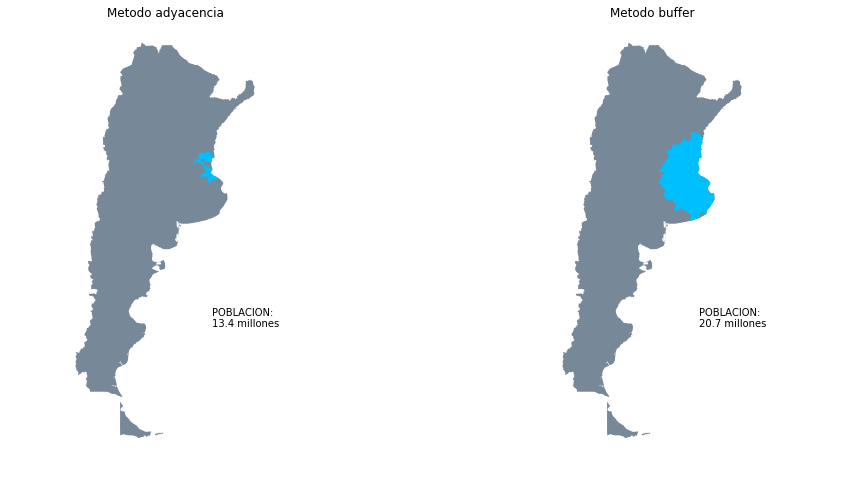

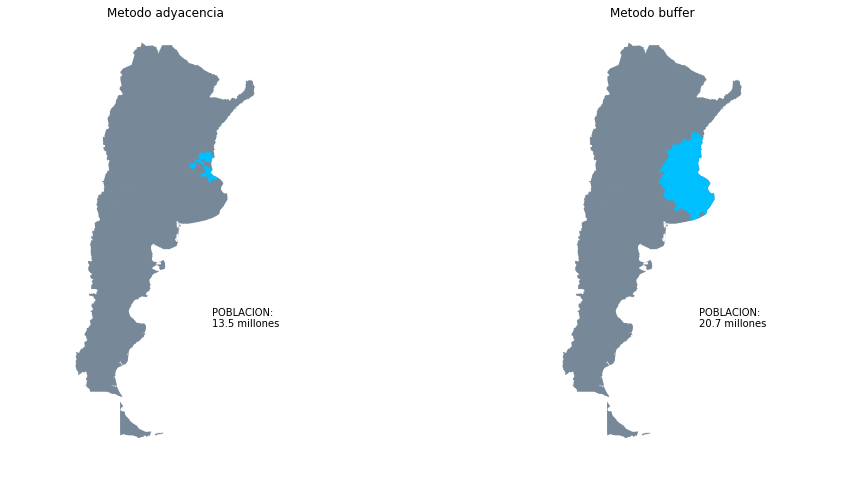

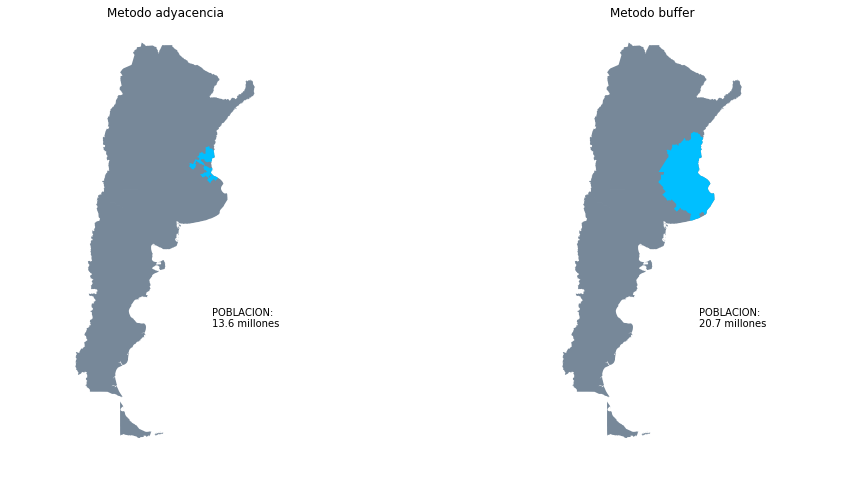

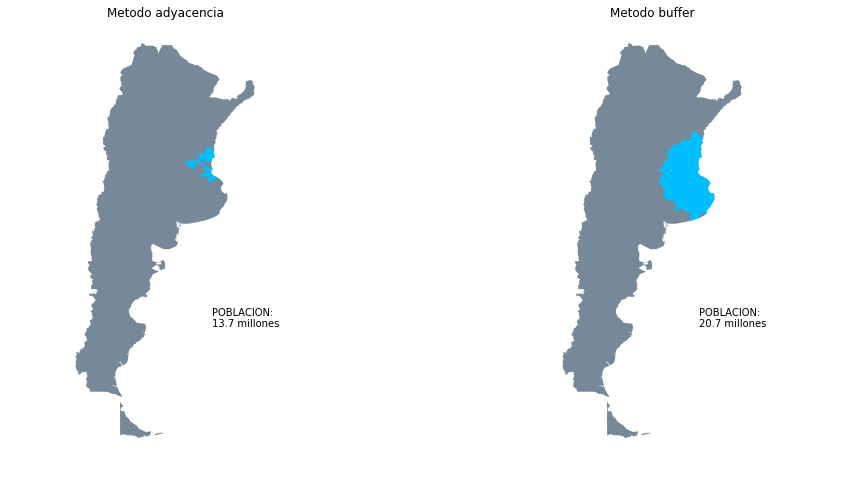

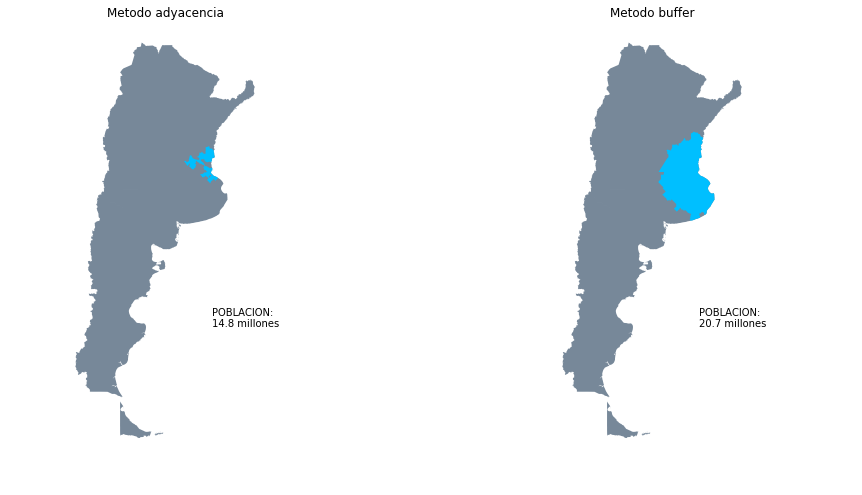

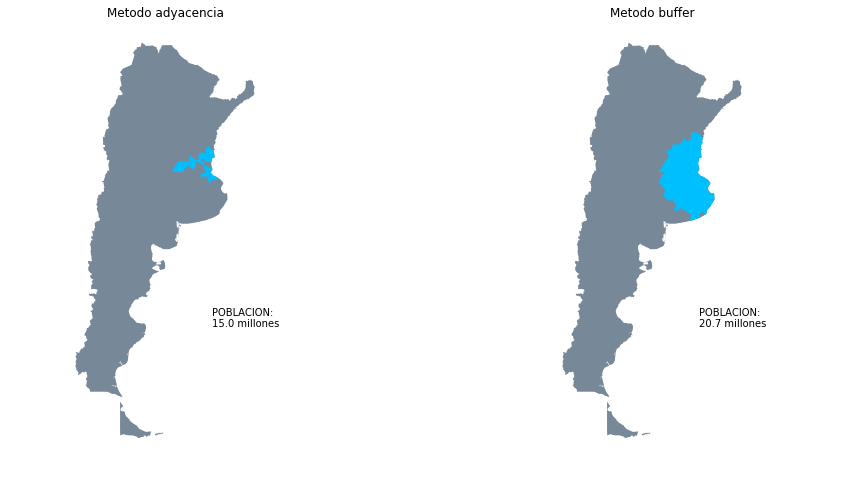

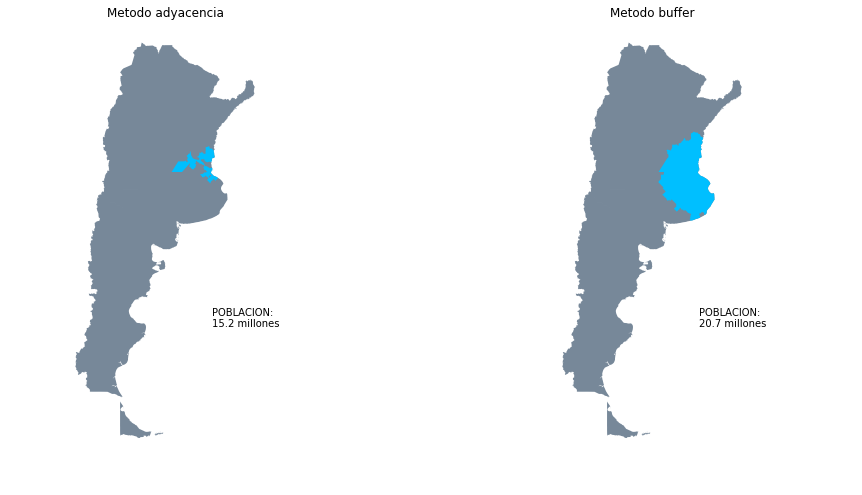

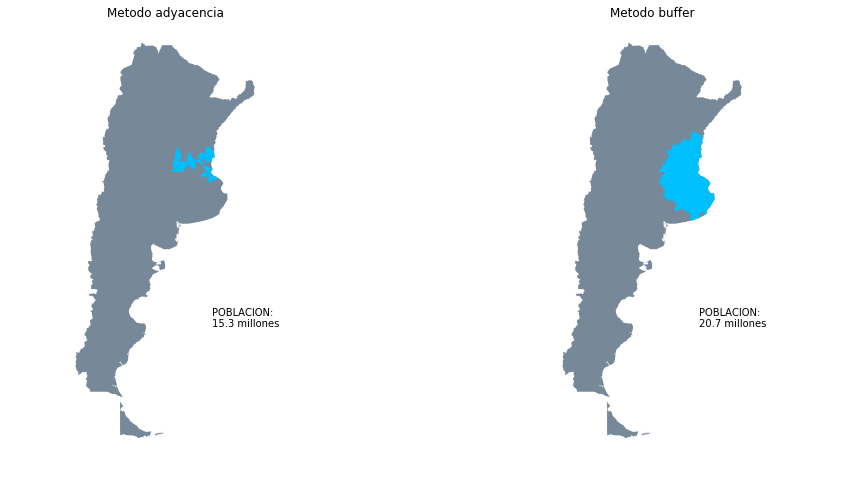

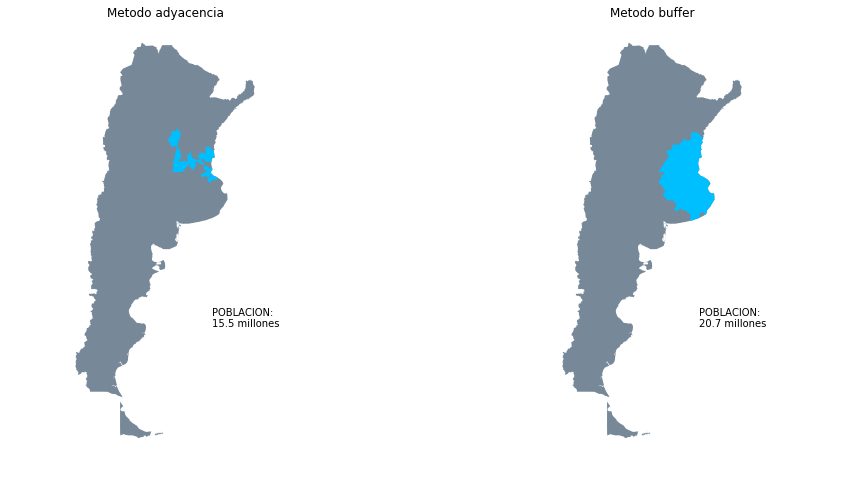

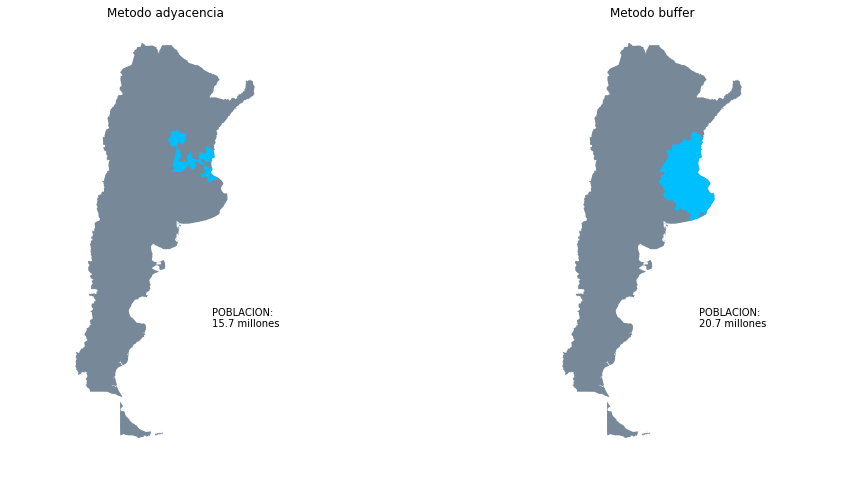

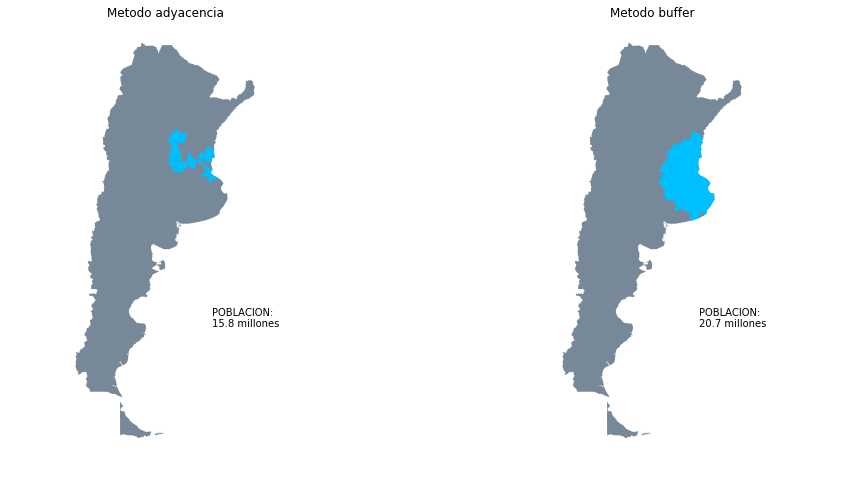

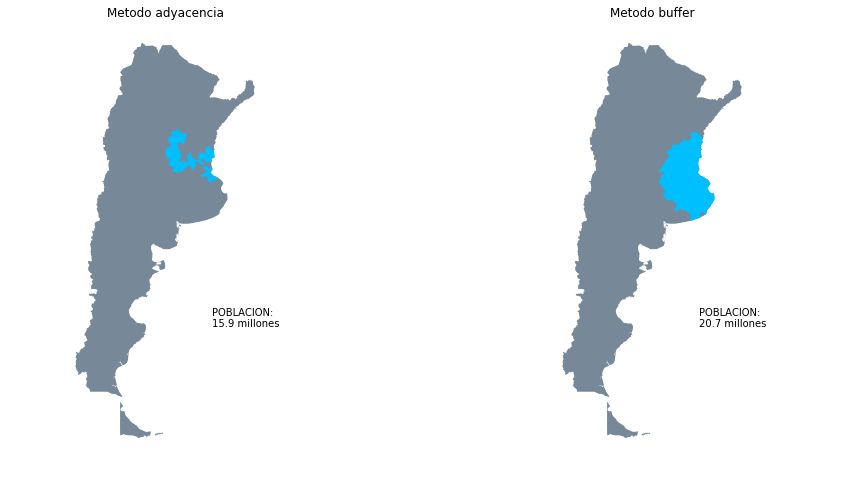

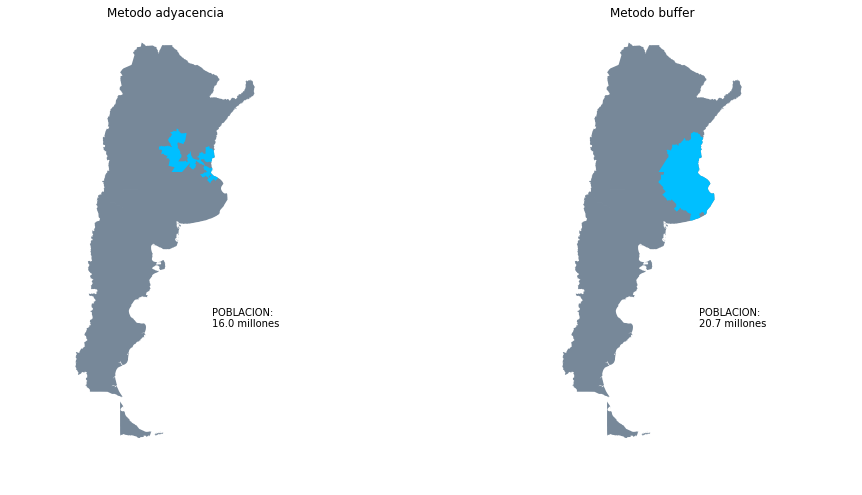

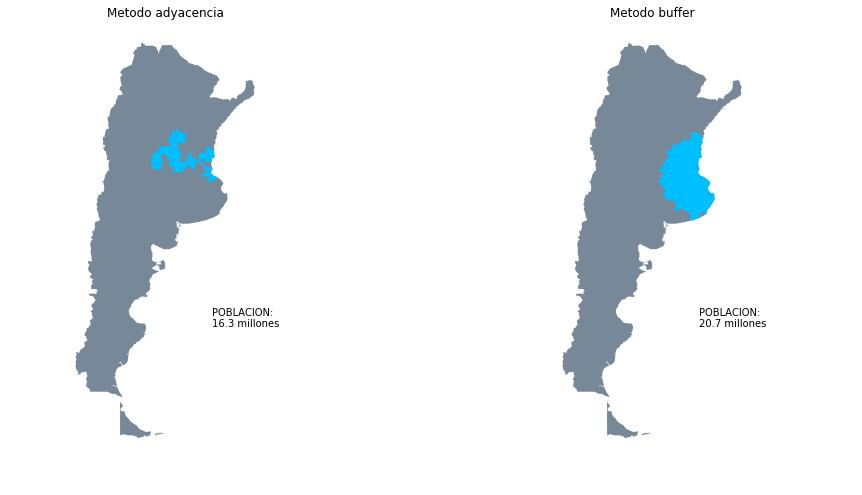

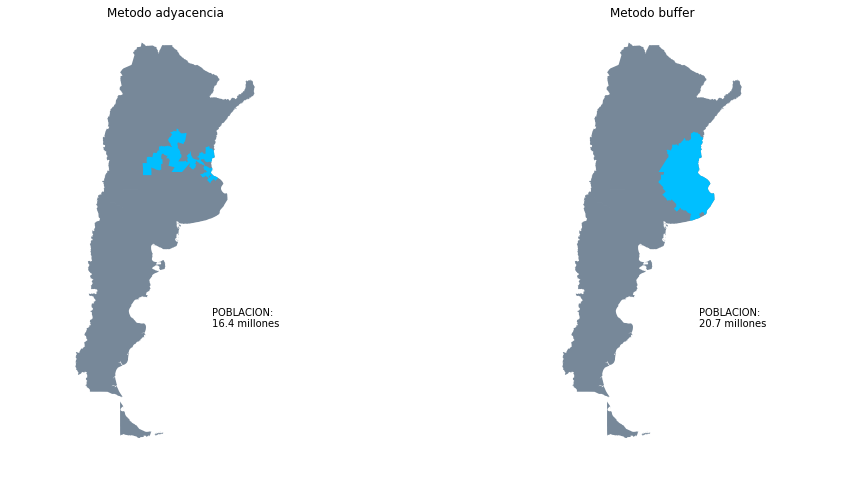

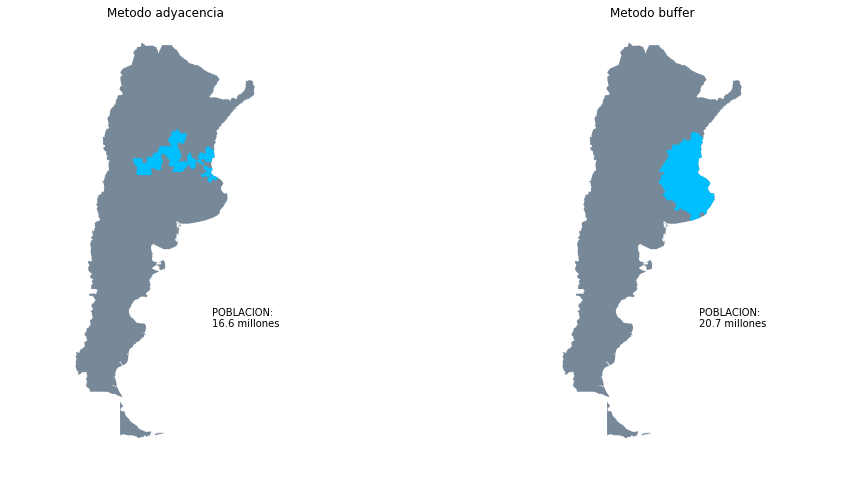

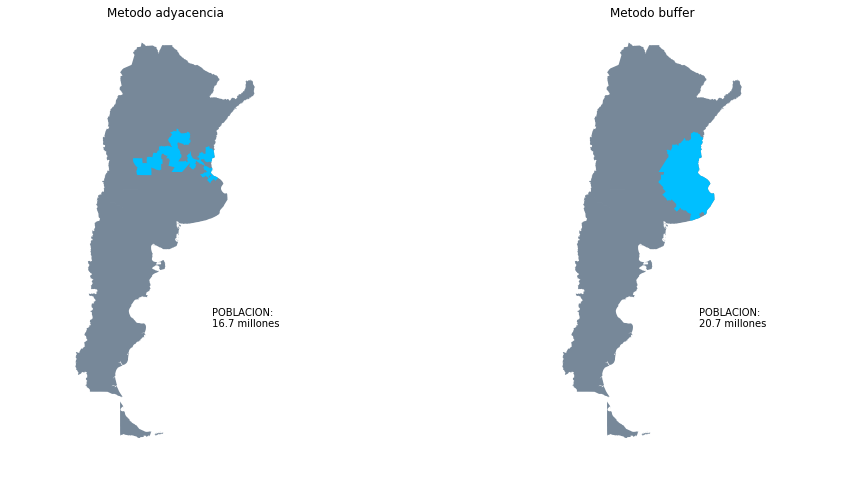

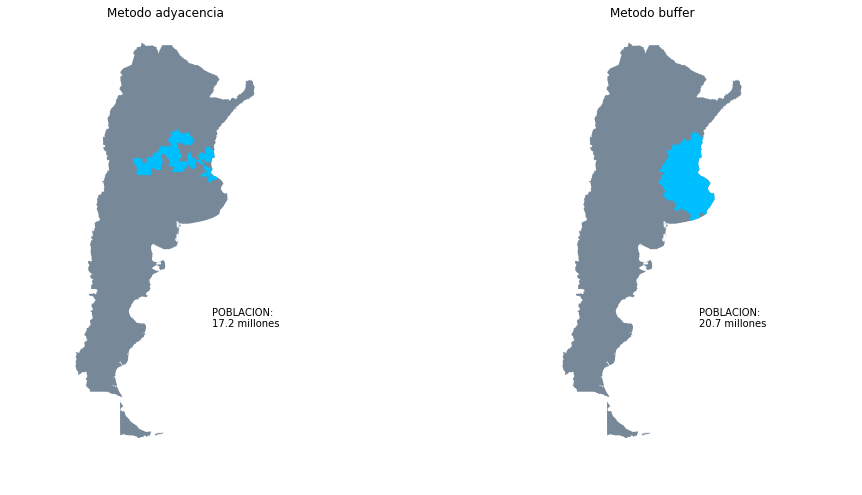

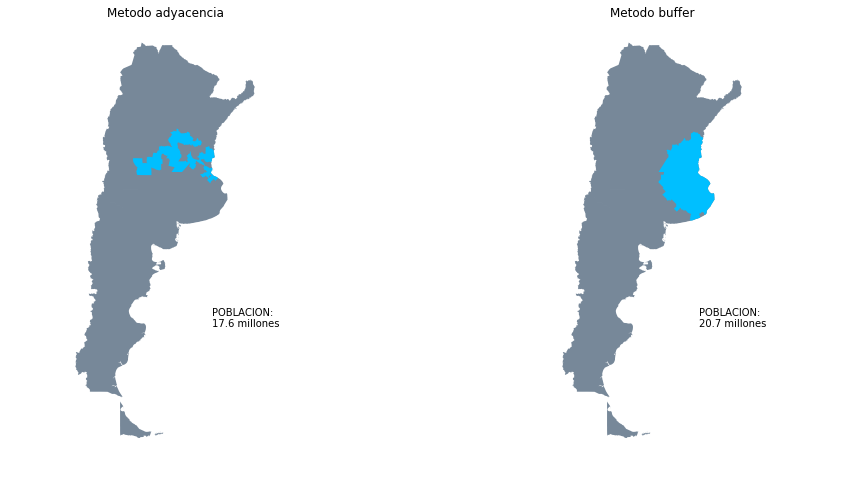

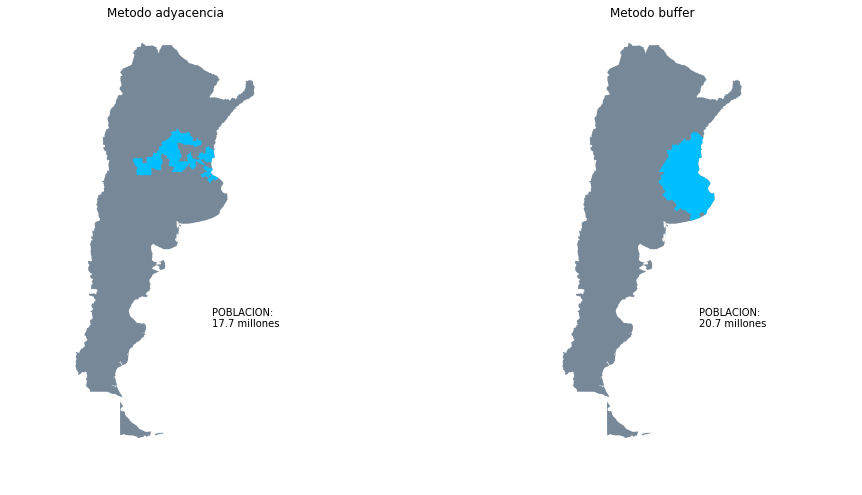

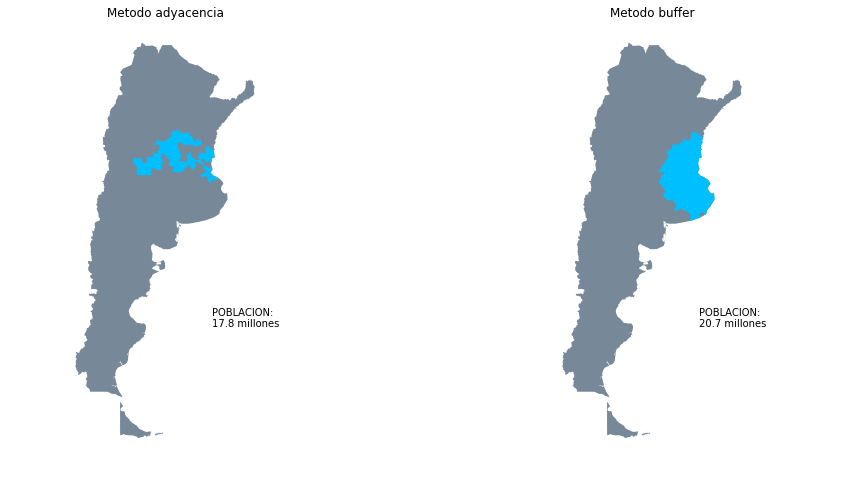

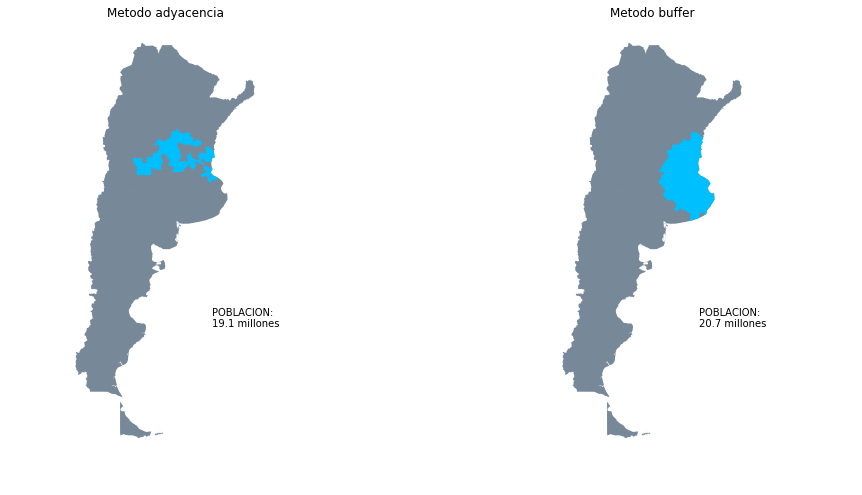

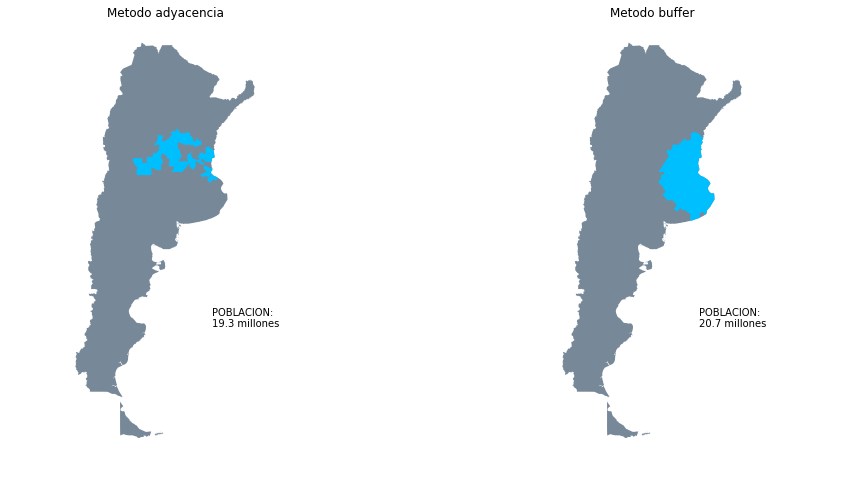

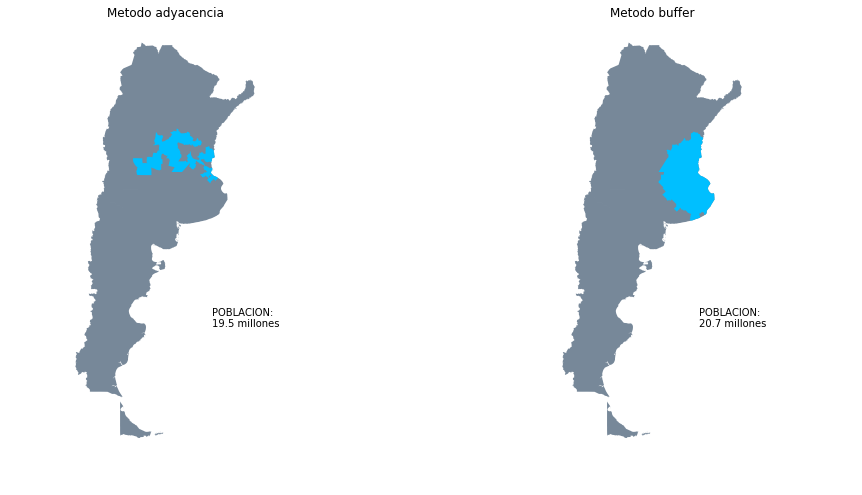

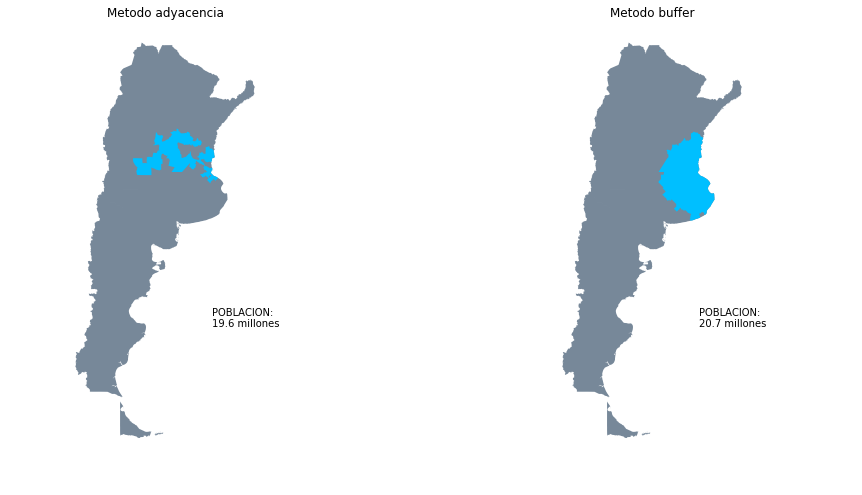

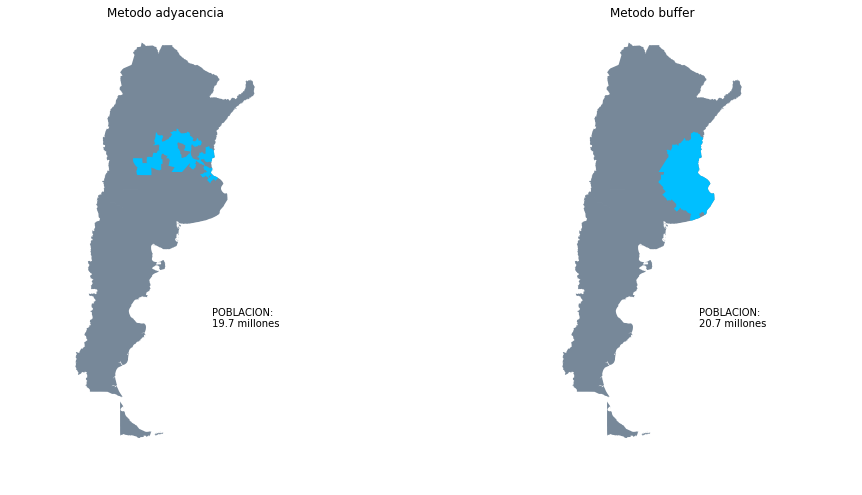

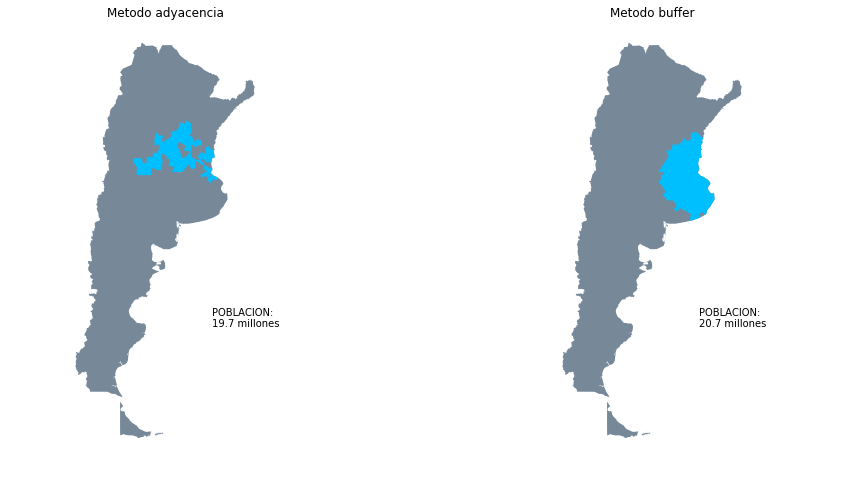

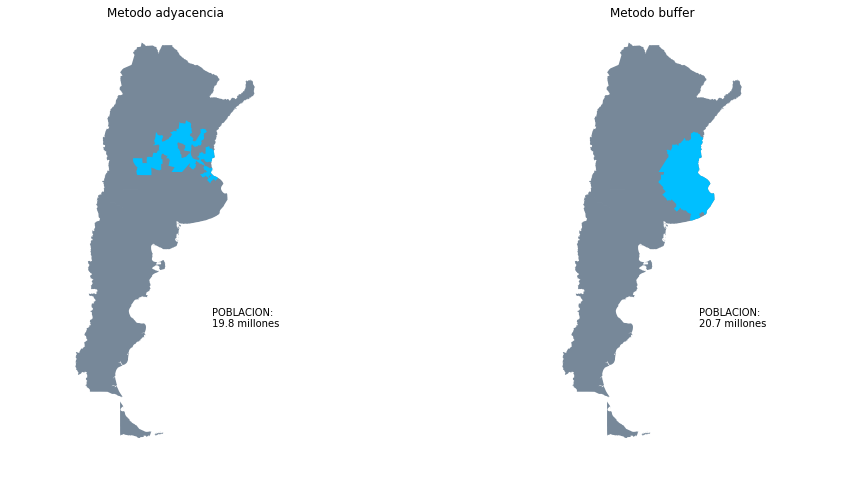

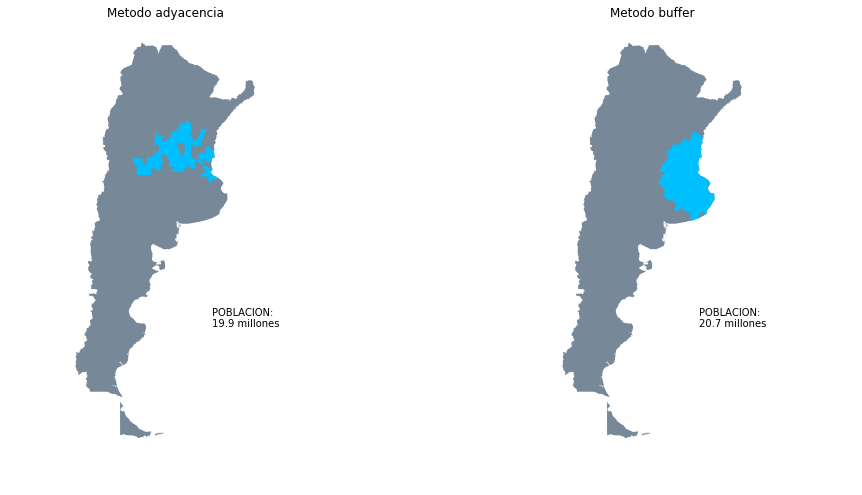

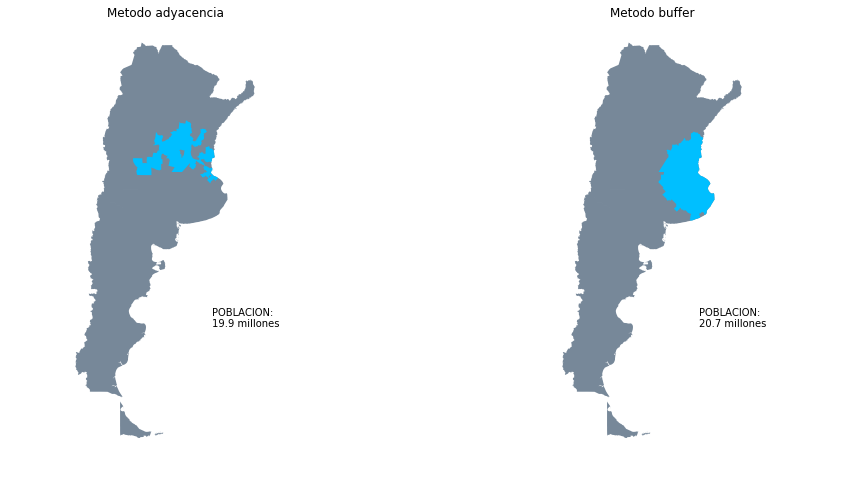

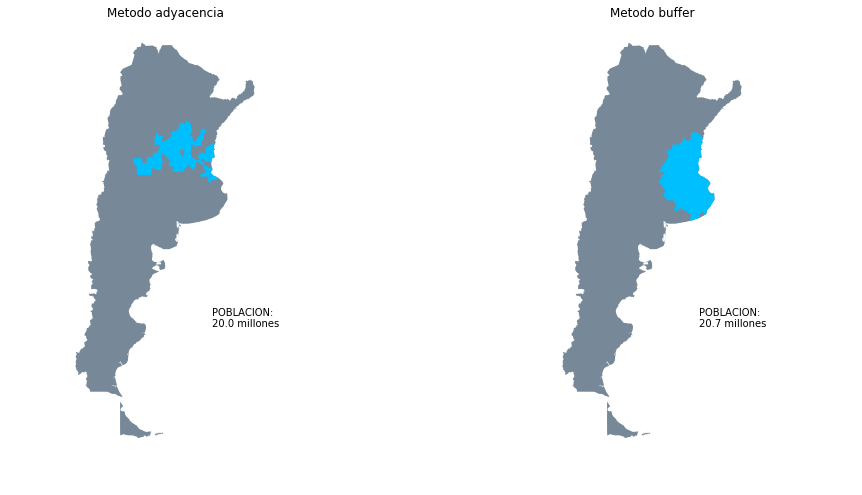

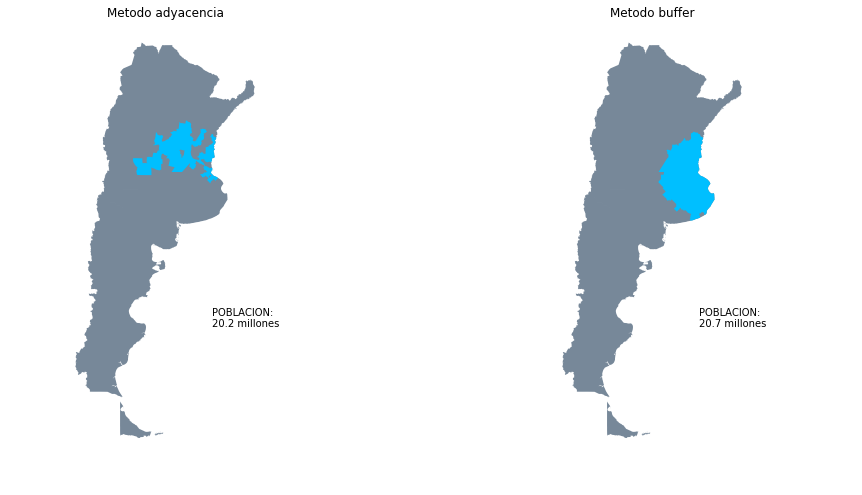

In [21]:
#parametros de inicializacion adyacencia
pol_ad = dt.loc[dt.loc[:,'poblacion'].idxmax(),'geometry']
resto_ad = dt.drop(dt.loc[:,'poblacion'].idxmax()).copy()
indices_ad = []
cuenta_ad = 0

#parametros inicializacion buffer
pol_buf = dt.loc[dt.departamen == 'Comuna 1','geometry'].item().buffer(1000 * 10)
#resto_buf = dt.drop(dt.loc[dt.departamen == 'Comuna 1'].index).copy()
indices_buf = []
cuenta_buf = 0

for i in range(len(dt)):
    if cuenta_ad <= limite:
        candidatos = resto_ad.loc[resto_ad.geometry.touches(pol_ad),:].copy()
        index_max_pob = candidatos.loc[:,'poblacion'].idxmax()
        indices_ad.append(index_max_pob)
        pol_union = resto_ad.loc[index_max_pob,'geometry']
        pol_ad = pol_ad.union(pol_union)
        cuenta_ad = cuenta_ad + resto_ad.loc[index_max_pob,'poblacion']
        resto_ad = resto_ad.drop(index_max_pob)
    
    if cuenta_buf <= limite:
        dentro = dt.loc[dt.geometry.intersects(pol_buf),:]
        pol_buf = pol_buf.buffer(1000 * 10)
        cuenta_buf = dentro.loc[:,'poblacion'].sum().item()
    
    #ploteo
    metodo_adyacencia = dt.loc[indices_ad,:].dissolve('diss')
    metodo_buffer = dentro.dissolve('diss')

    f,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
    dt_plot.plot(ax=ax1,color='lightslategray')
    metodo_adyacencia.plot(ax=ax1,color='deepskyblue')

    dt_plot.plot(ax=ax2,color='lightslategray')
    metodo_buffer.plot(ax=ax2,color='deepskyblue')

    plt.axis('equal')
    ax1.set_title('Metodo adyacencia')
    ax2.set_title('Metodo buffer')
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax1.annotate('POBLACION:\n'+str(round(cuenta_ad / 1000000 , 1))+' millones',
                xy=(-6.5*10**6, -6*10**6))
    ax2.annotate('POBLACION:\n'+str(round(cuenta_buf / 1000000 , 1))+' millones',
                xy=(-6.5*10**6, -6*10**6))
    f.savefig('mapa_'+str(i)+'.png')
    if (cuenta_ad > limite) & (cuenta_buf > limite):
        break

Text(-6500000.0, -6000000, 'POBLACION:\n20.7 millones')

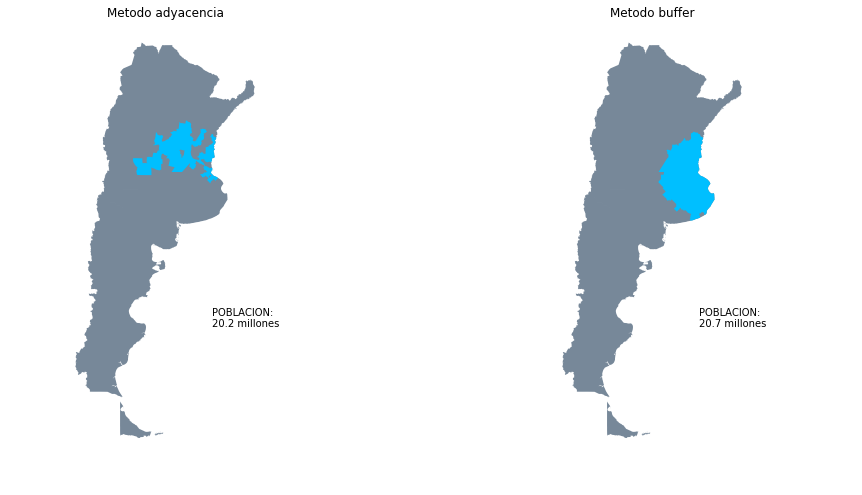

In [22]:
metodo_adyacencia = dt.loc[indices_ad,:].dissolve('diss')
metodo_buffer = dentro.dissolve('diss')

f,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
dt_plot.plot(ax=ax1,color='lightslategray')
metodo_adyacencia.plot(ax=ax1,color='deepskyblue')

dt_plot.plot(ax=ax2,color='lightslategray')
metodo_buffer.plot(ax=ax2,color='deepskyblue')

plt.axis('equal')
ax1.set_title('Metodo adyacencia')
ax2.set_title('Metodo buffer')
ax1.set_axis_off()
ax2.set_axis_off()
ax1.annotate('POBLACION:\n'+str(round(cuenta_ad / 1000000 , 1))+' millones',
            xy=(-6.5*10**6, -6*10**6))
ax2.annotate('POBLACION:\n'+str(round(cuenta_buf / 1000000 , 1))+' millones',
            xy=(-6.5*10**6, -6*10**6))

In [23]:
f.savefig('mapa_final.png')
